In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


C:\Users\adity\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("PEP1.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.shape

(1460, 81)

In [4]:
df.describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
pd.set_option('display.max_rows',None)
isnull_columns = df.isna().sum()
isnull_columns = isnull_columns[isnull_columns > 0]
#isnull_columns
isnull_columns

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
isnull_columns_remove = isnull_columns[isnull_columns > 1100]

In [8]:
lst = isnull_columns_remove.index[0:].tolist()
print(lst)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [9]:
df = df.drop(columns=lst,axis = 1)
isnull_columns = df.isna().sum()
isnull_columns = isnull_columns[isnull_columns > 0]
isnull_columns

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [10]:
df.shape

(1460, 77)

In [11]:
dfNum = df.select_dtypes(exclude='object') # Numeric Columns
dfCat = df.select_dtypes(include='object') # Category Columns
dfCat['Id'] = df['Id'] # Add Id column to Category columns for merge later
dfCat['SalePrice'] = df['SalePrice'] 

In [12]:
first_column = dfCat.pop('Id')
  
# insert column using insert(position,column_name,
dfCat.insert(0, 'Id', first_column)
dfCat.head()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [13]:
dfNum.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

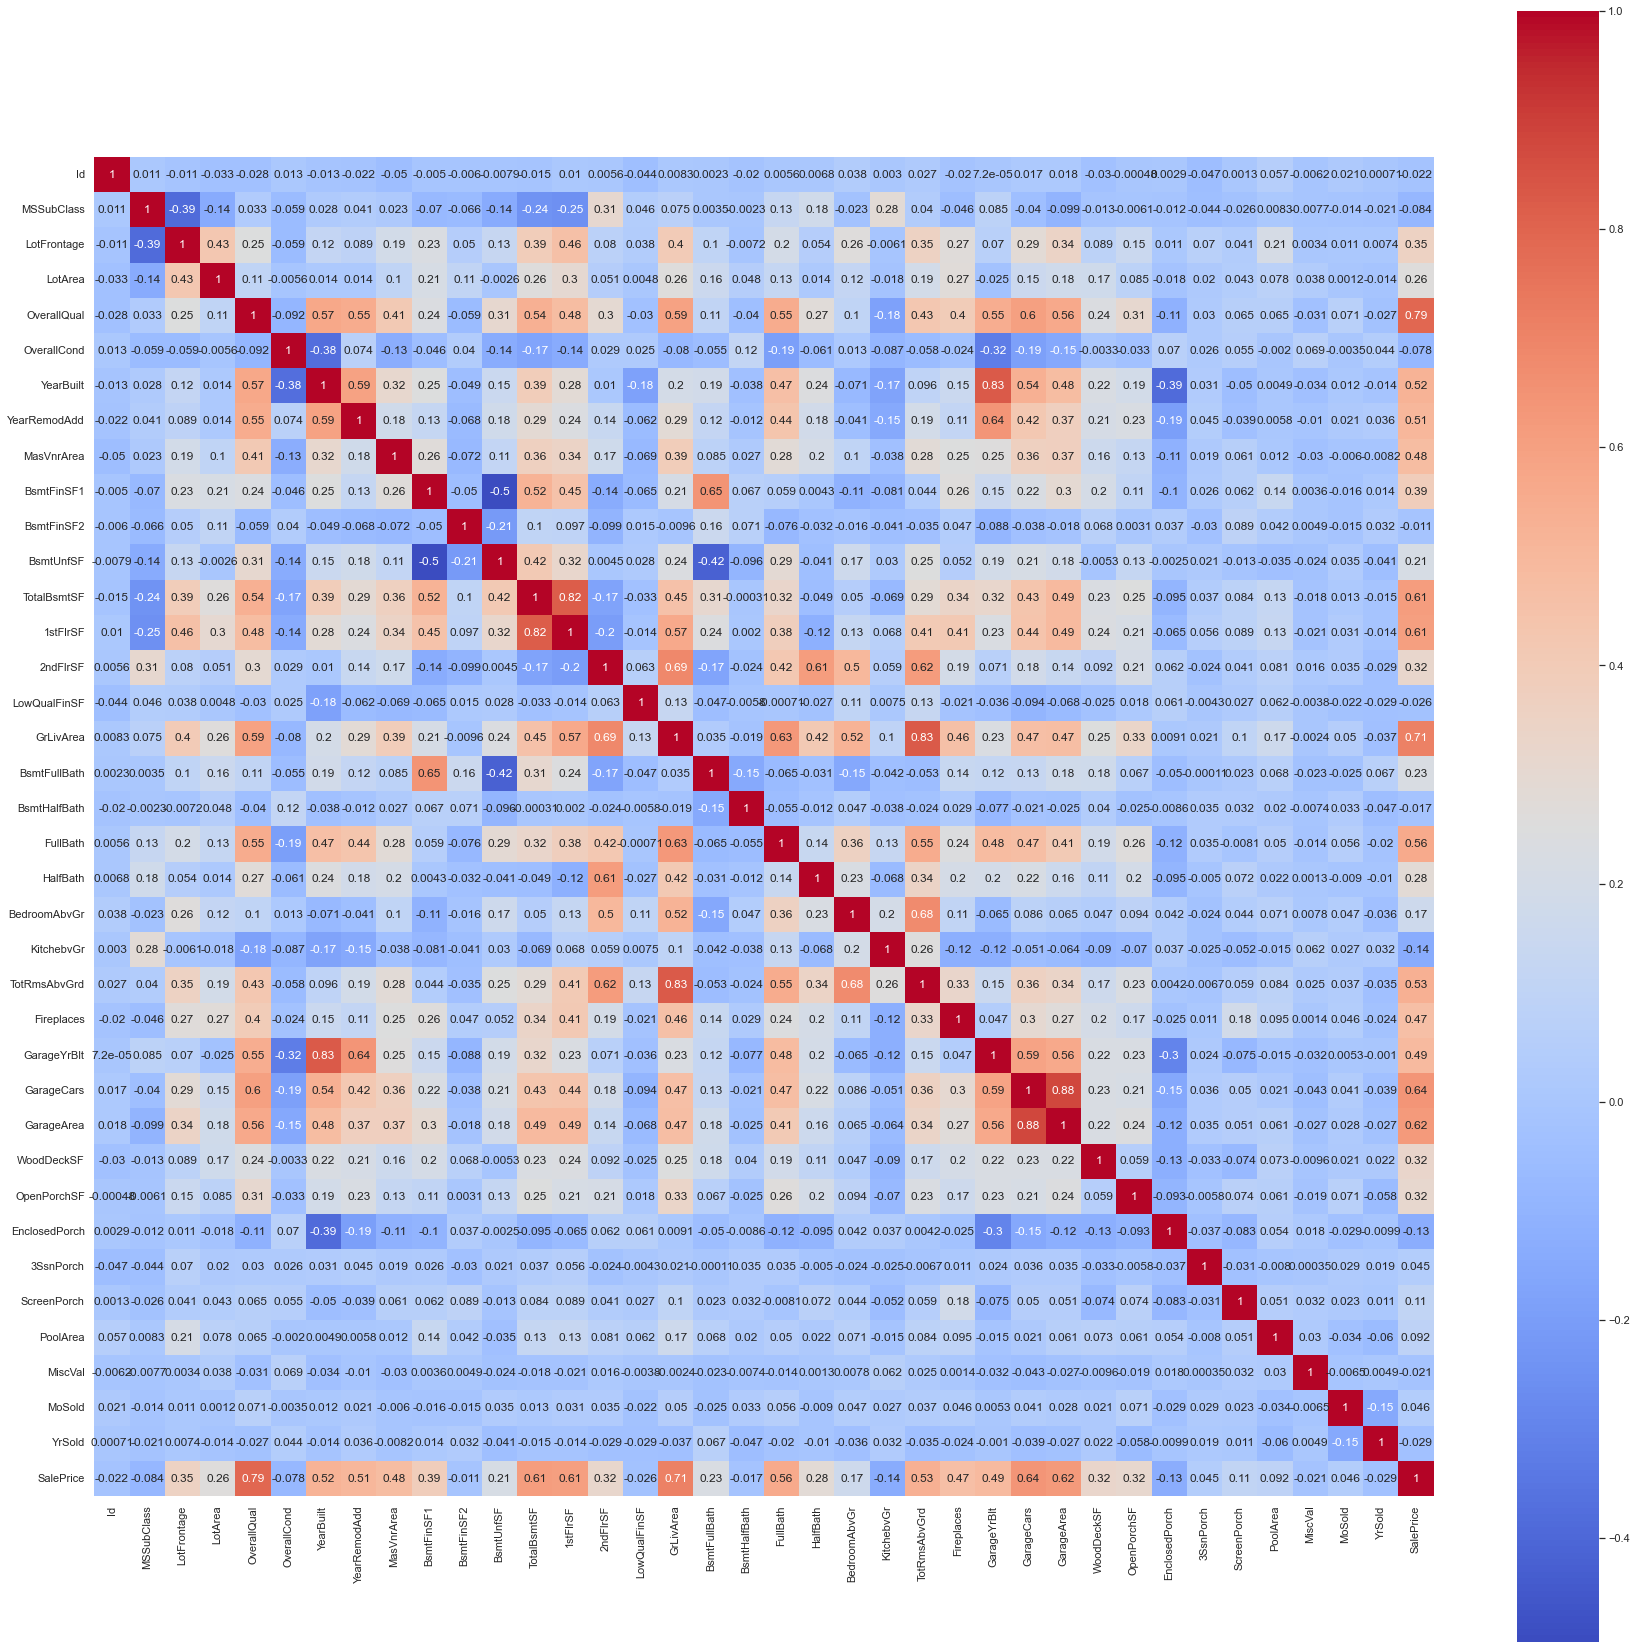

In [14]:
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(data=dfNum.corr(), square=True, annot=True, fmt='.2g',  cmap="coolwarm")

In [15]:
dfNumHigh = dfNum.loc[:, dfNum.corr().abs()['SalePrice'] > 0.3]

# ADD Id Column Back to the DataFrame for merging later
dfNumHigh['Id'] = dfNum['Id']
# shift Id column to first position
first_column = dfNumHigh.pop('Id')
  
# insert column using insert(position,column_name,
dfNumHigh.insert(0, 'Id', first_column)

In [16]:
dfNumHigh.describe()

,Id,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,6.099315,1971.267808,1984.865753,103.685262,443.639726,1057.429452,1162.626712,346.992466,1515.463699,1.565068,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,180921.195890
std,421.610009,24.284752,1.382997,30.202904,20.645407,181.066207,456.098091,438.705324,386.587738,436.528436,525.480383,0.550916,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,79442.502883
min,1.000000,21.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,795.750000,882.000000,0.000000,1129.500000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,6.000000,1973.000000,1994.000000,0.000000,383.500000,991.500000,1087.000000,0.000000,1464.000000,2.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,163000.000000
75%,1095.250000,80.000000,7.000000,2000.000000,2004.000000,166.000000,712.250000,1298.250000,1391.250000,728.000000,1776.750000,2.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,214000.000000
max,1460.000000,313.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,755000.000000


In [17]:
dfNum = dfNumHigh
null_columns = dfNum.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [18]:
lst = null_columns.index[0:].tolist()
print(lst)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [19]:
def replaceNan(lst, df):
    for i in lst:
        print('UPDATING: ' + str(i))
        df[i].fillna(value=df[i].mean().astype('float'), inplace=True)
    return df

dfNum = replaceNan(lst,dfNum)
dfNum.head()

UPDATING: LotFrontage
UPDATING: MasVnrArea
UPDATING: GarageYrBlt


,Id,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,1,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,2,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,3,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,4,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,5,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [20]:
null_columns = dfNum.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Series([], dtype: int64)

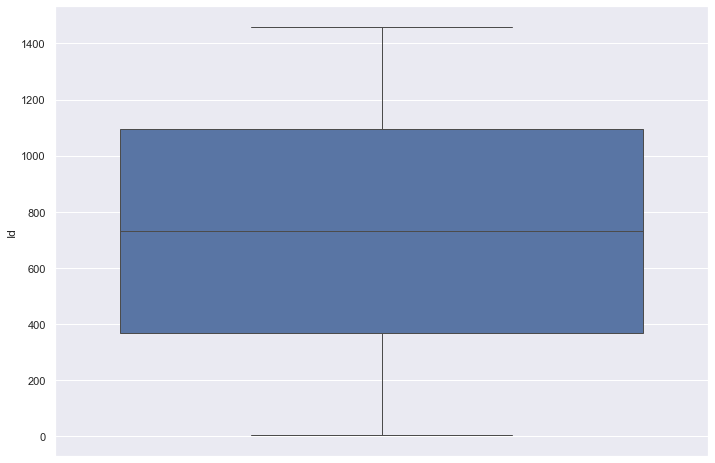

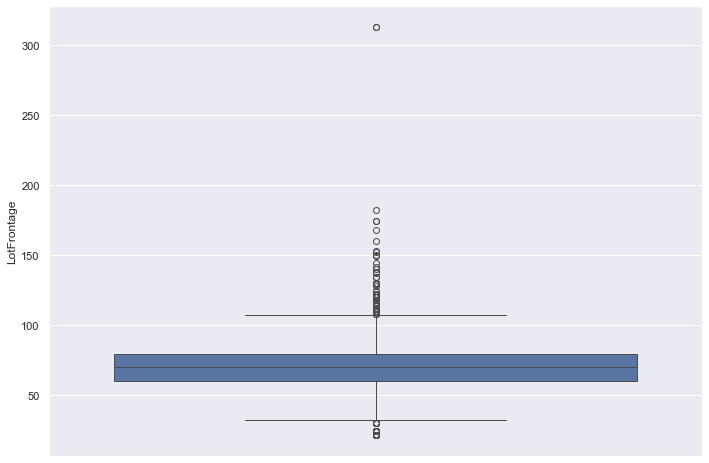

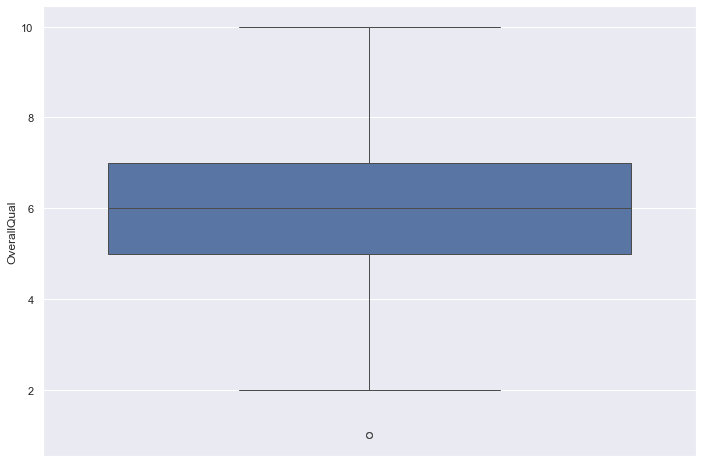

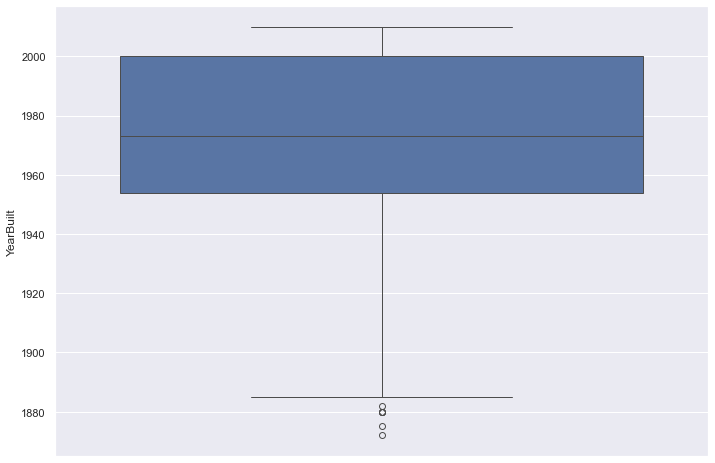

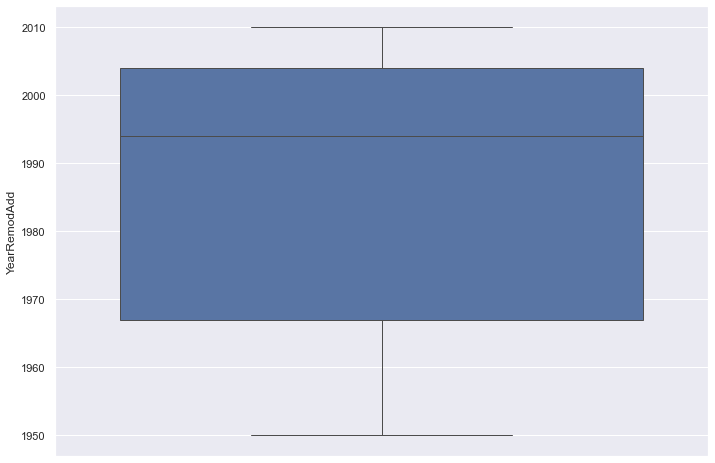

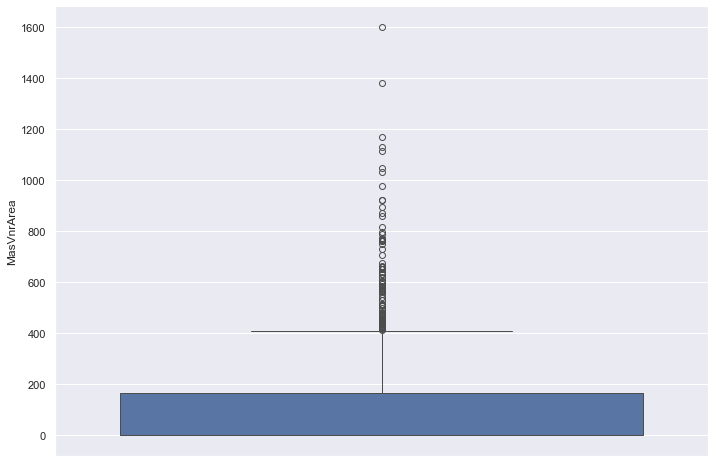

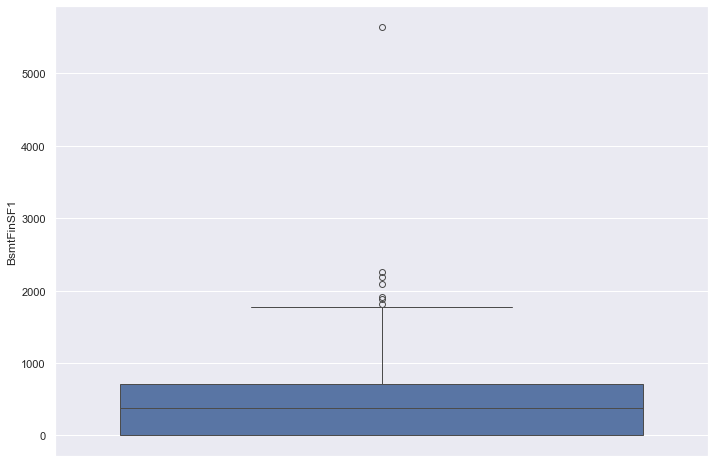

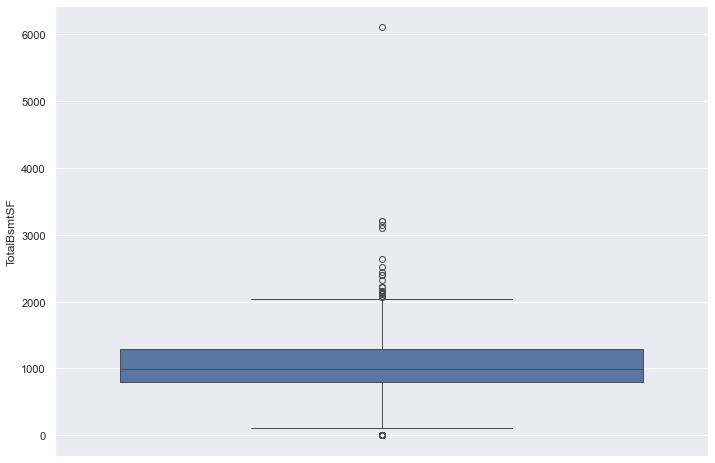

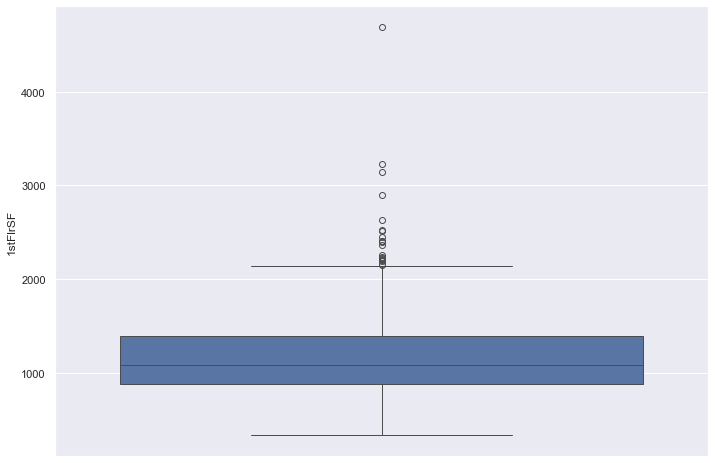

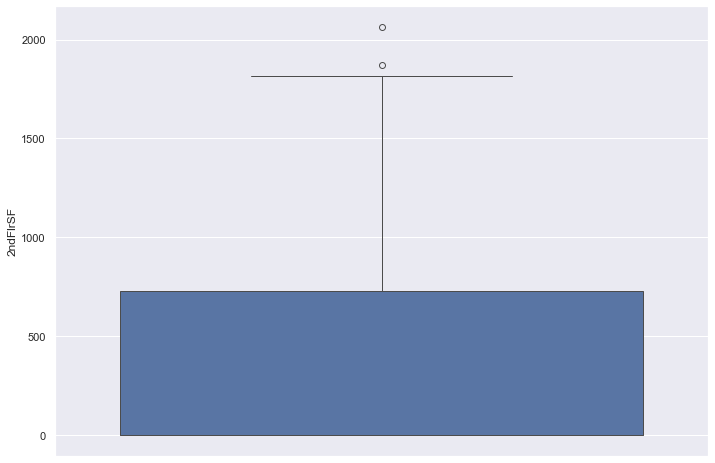

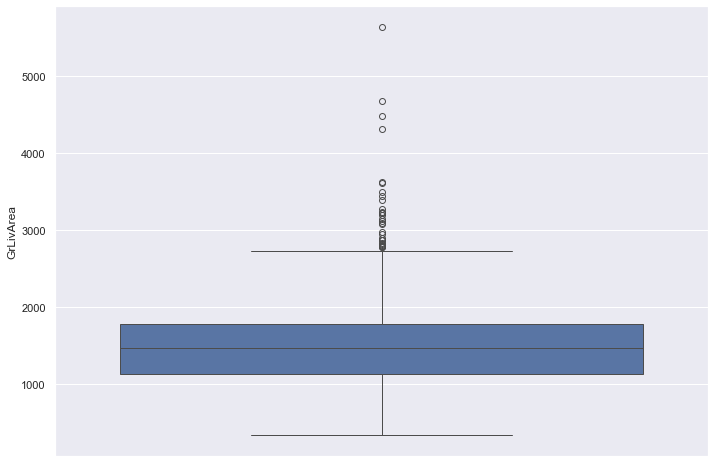

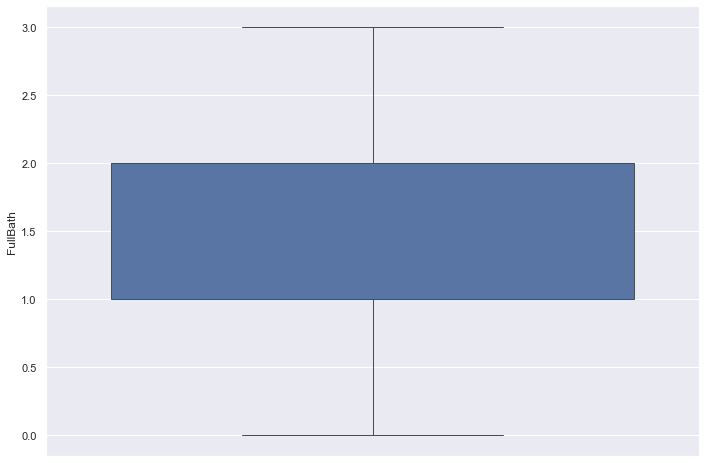

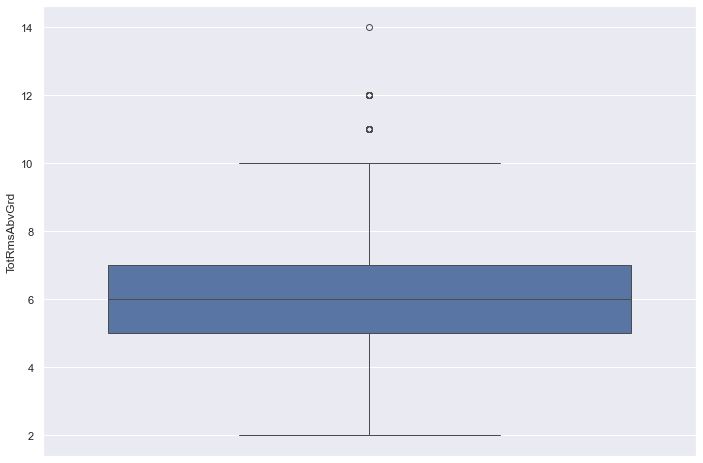

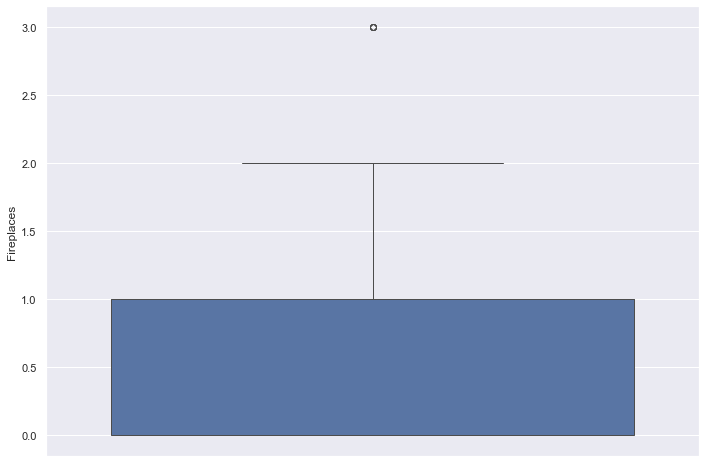

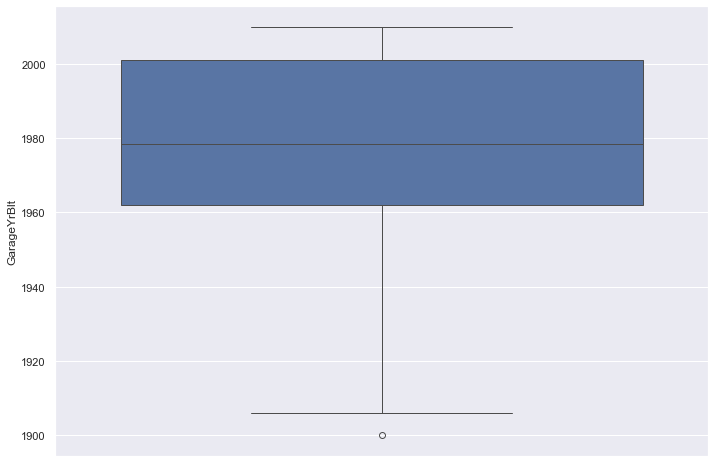

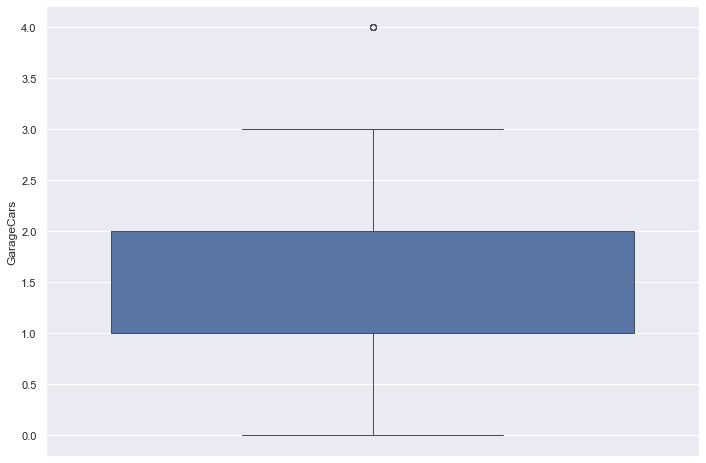

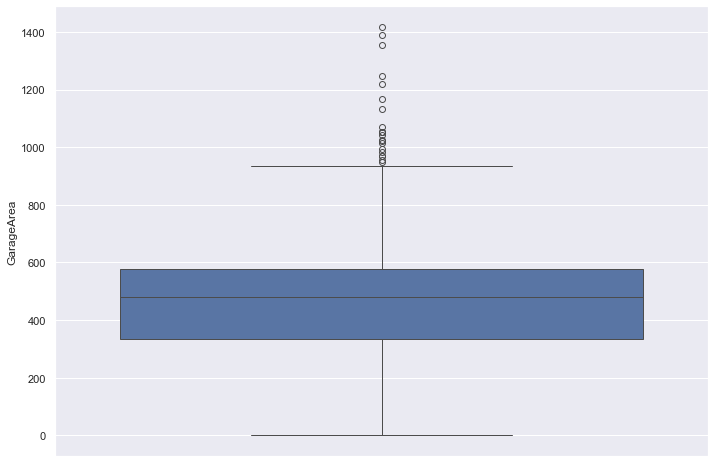

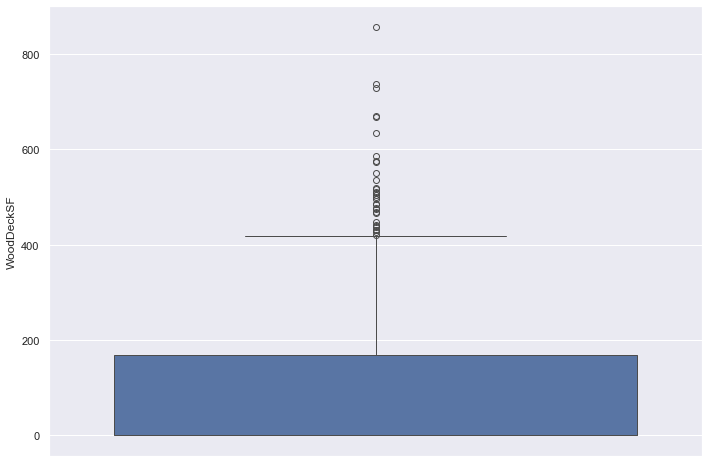

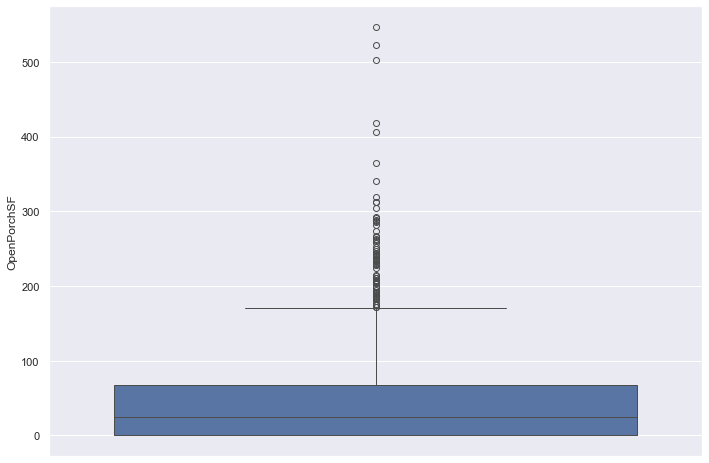

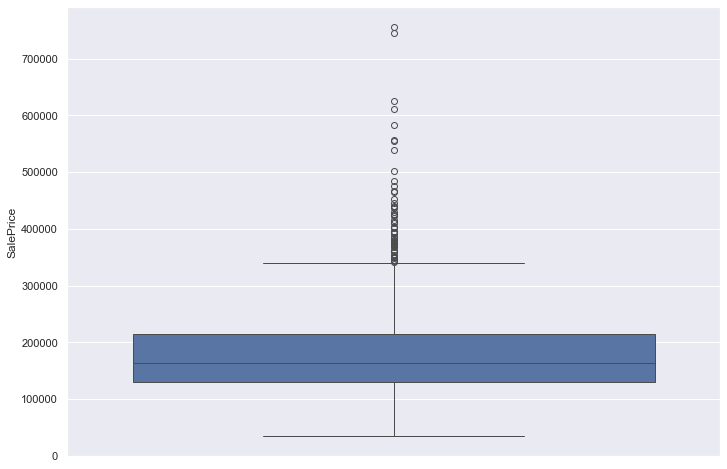

In [21]:
def boxplotloop(df, columns):
    for col in columns:
        if df[col].dtype != object:
            sns.set(rc={'figure.figsize':(11.7,8.27)})
            sns.boxplot(df[col])
            plt.show()
        
            
            
boxplotloop(dfNum, dfNum.describe().columns)

In [22]:
def cleanup_outliers(df,columns):
    # df = dataframe
    # column takes a list of numerical columns
    
    for col in columns:
        print('Working on column: {}'.format(col))
        if (df[col].dtype != object) :
            q1,q3 = np.percentile(df[col], [25,75])
            iqr = q3-q1
            minv = q1-(1.5*iqr)  
            maxv = q3+(1.5*iqr)  
            med  = df[col].median()
            #data[col] = data[col].apply(lambda x: maxv if x>maxv else minv if x<minv else x)
            df[col] = np.where(df[col]>maxv , maxv, df[col]).astype(df[col].dtype)
            df[col] = np.where(df[col]<minv , minv, df[col]).astype(df[col].dtype)
        
    return df

In [23]:
df2Num = cleanup_outliers(dfNum, dfNum.columns)

Working on column: Id
Working on column: LotFrontage
Working on column: OverallQual
Working on column: YearBuilt
Working on column: YearRemodAdd
Working on column: MasVnrArea
Working on column: BsmtFinSF1
Working on column: TotalBsmtSF
Working on column: 1stFlrSF
Working on column: 2ndFlrSF
Working on column: GrLivArea
Working on column: FullBath
Working on column: TotRmsAbvGrd
Working on column: Fireplaces
Working on column: GarageYrBlt
Working on column: GarageCars
Working on column: GarageArea
Working on column: WoodDeckSF
Working on column: OpenPorchSF
Working on column: SalePrice


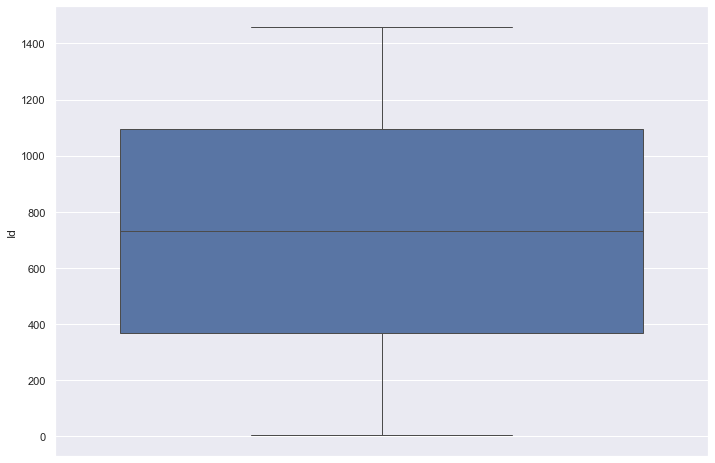

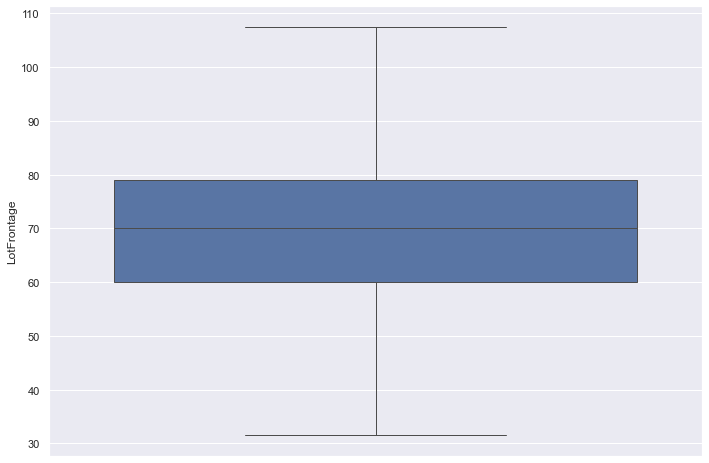

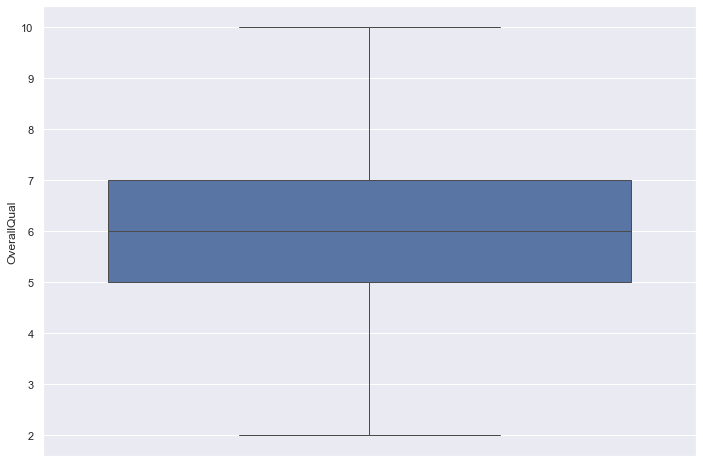

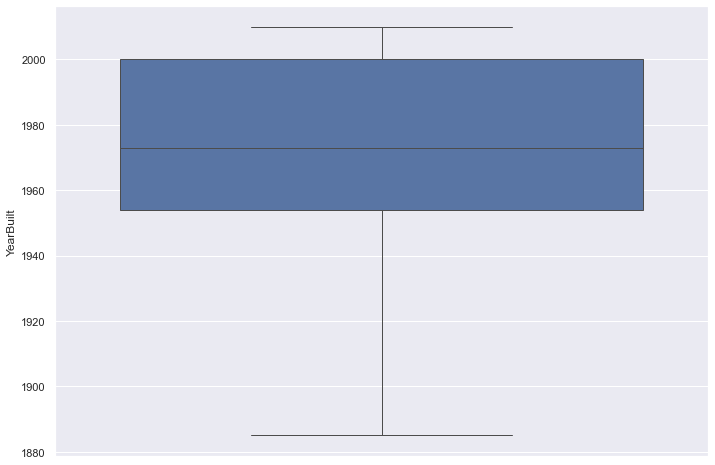

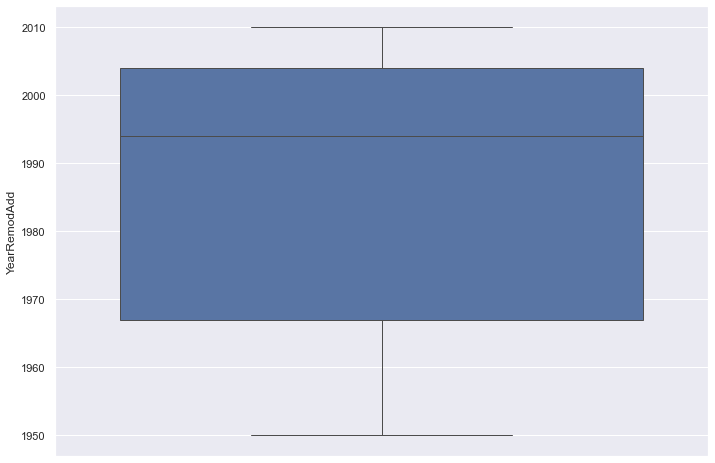

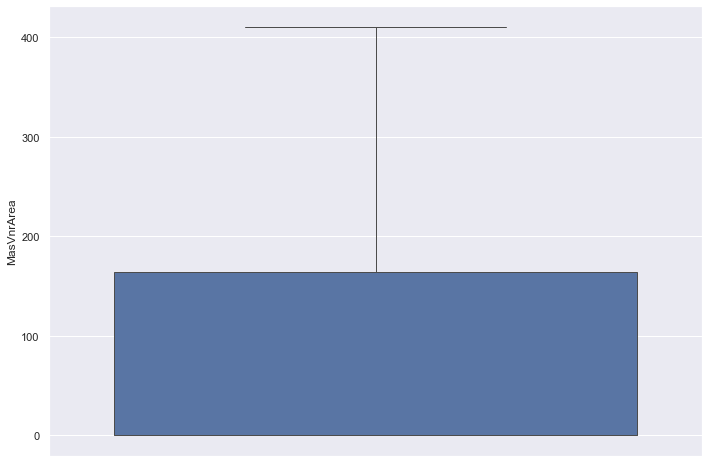

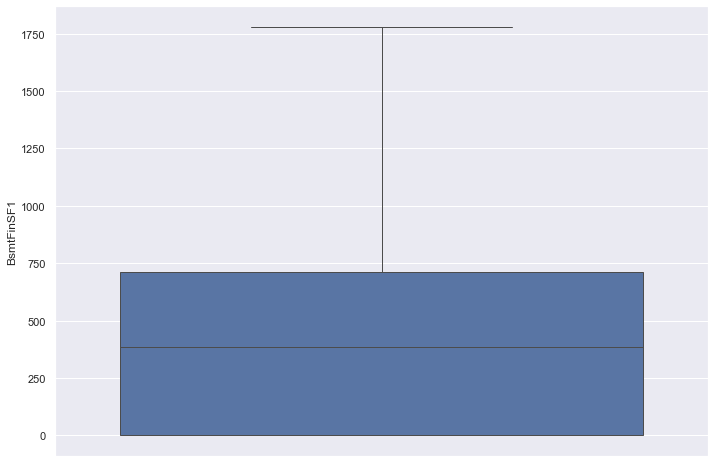

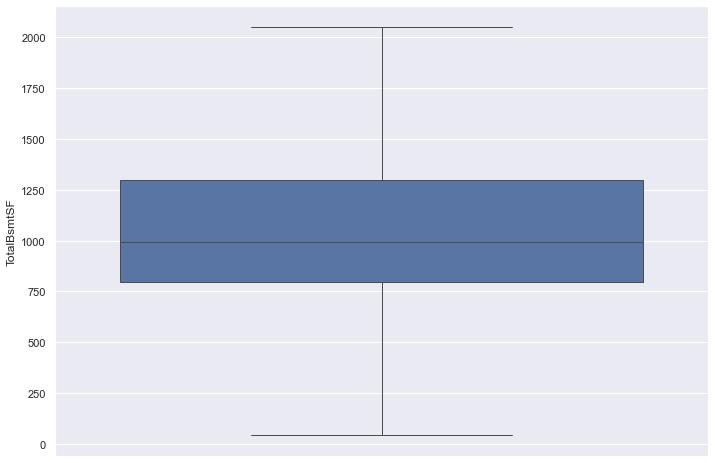

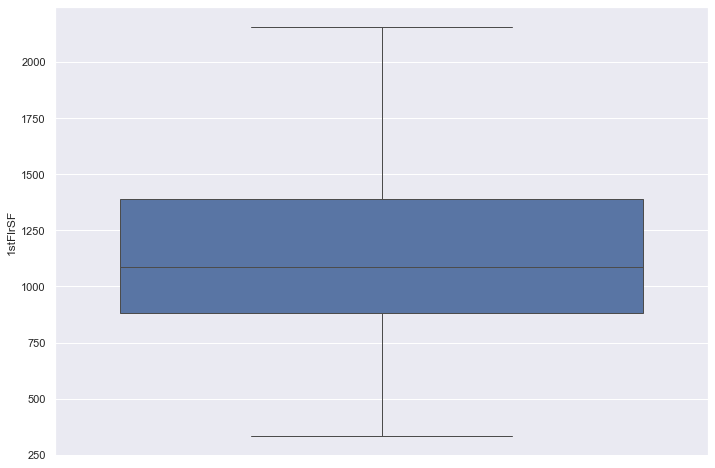

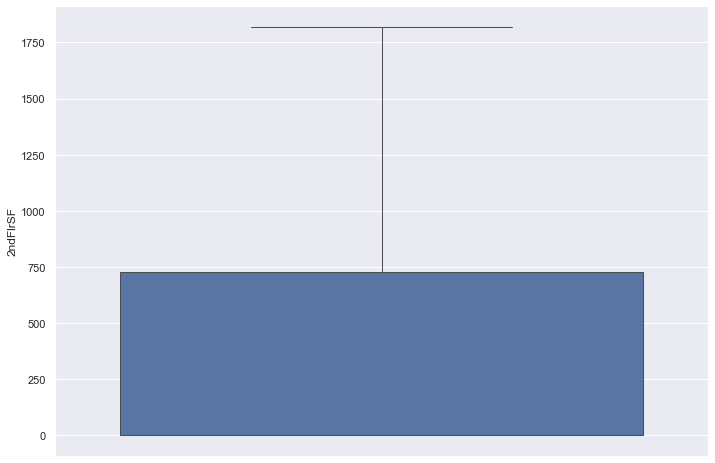

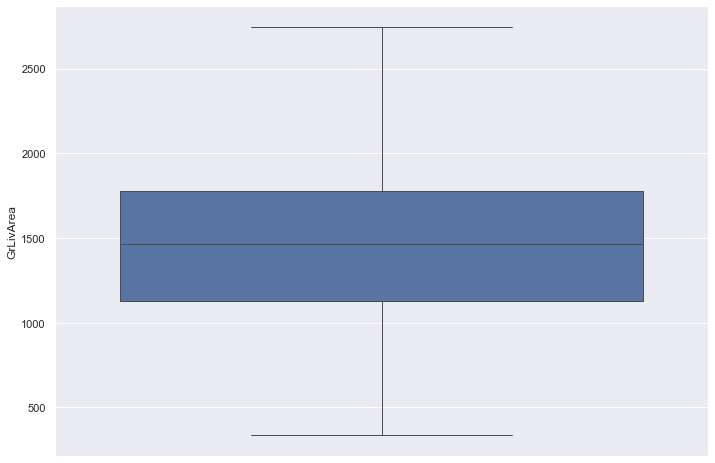

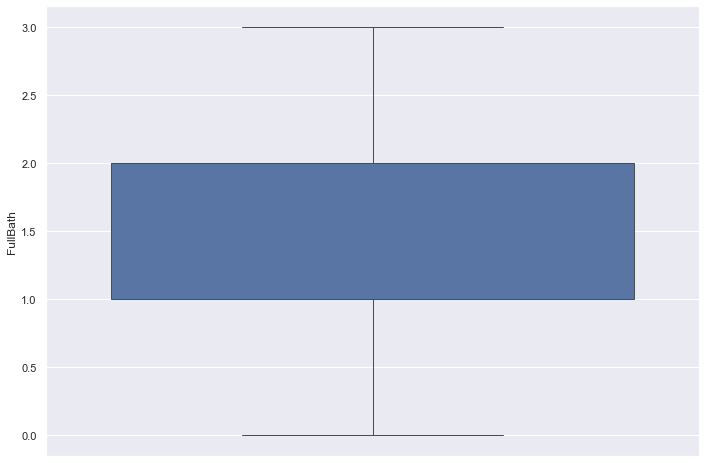

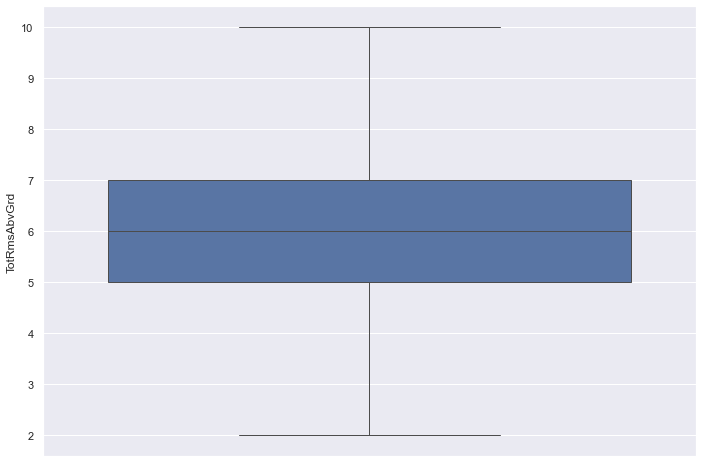

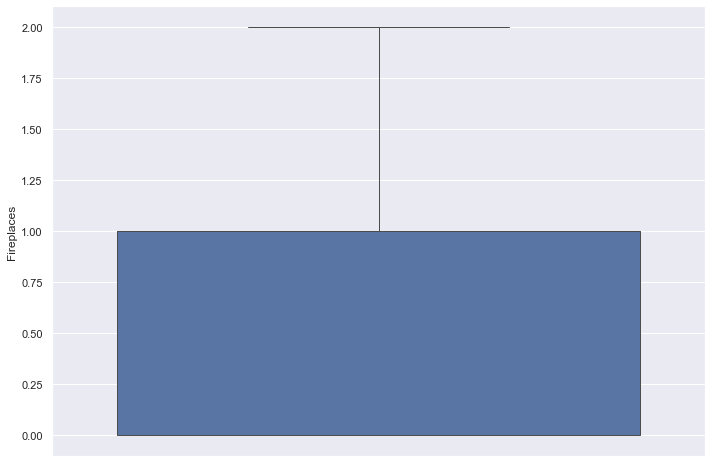

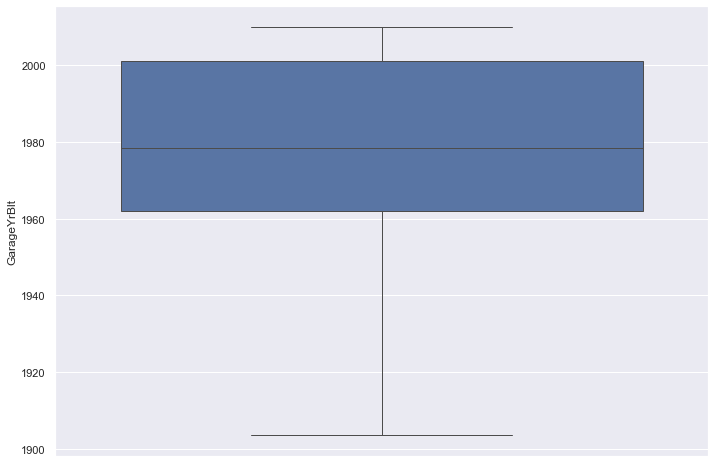

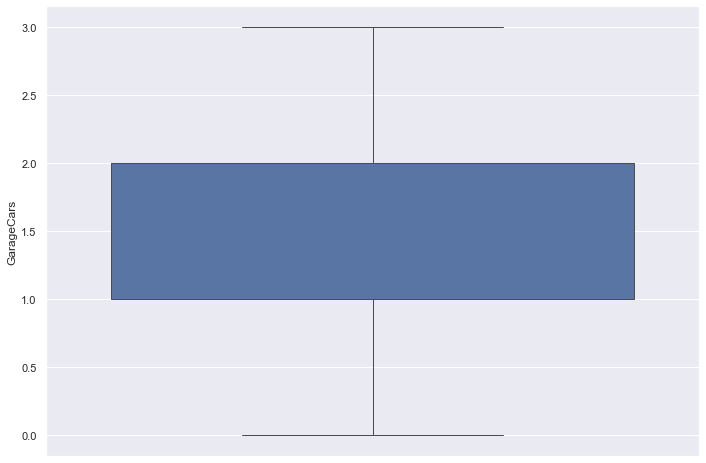

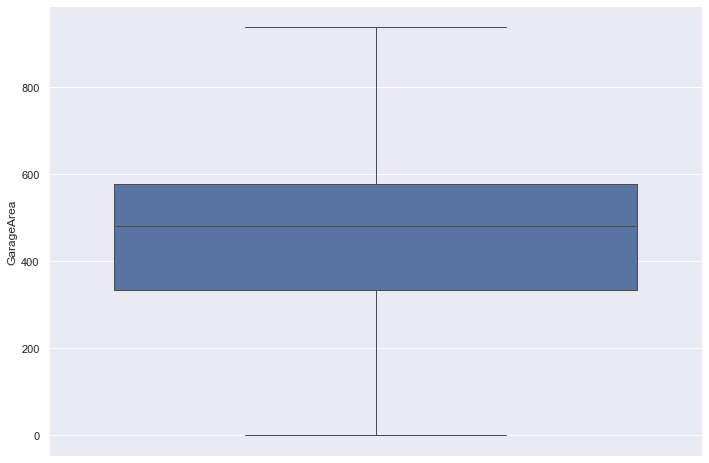

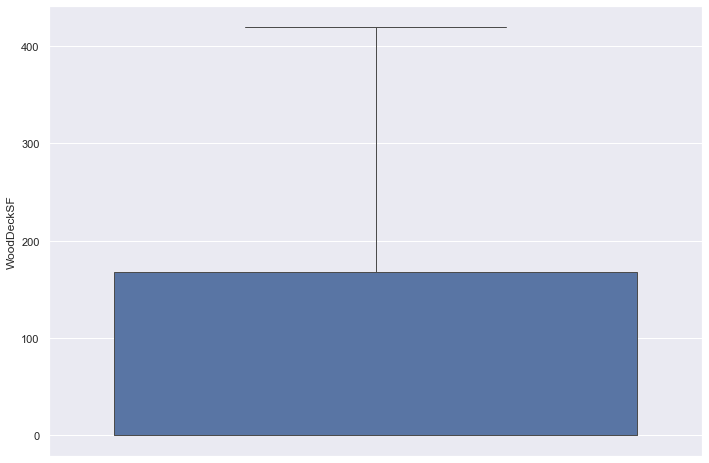

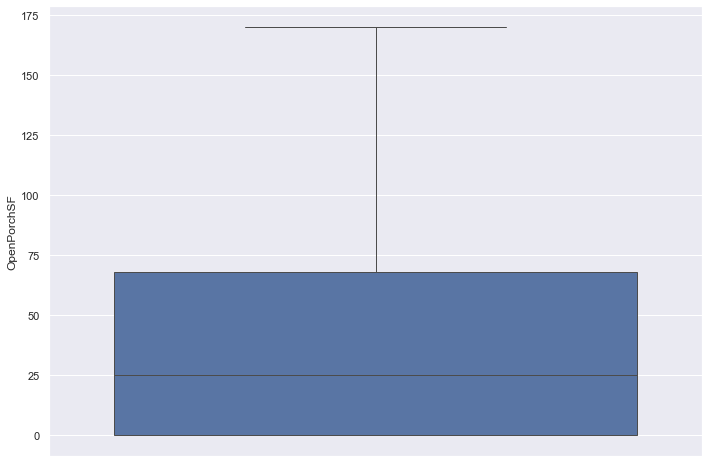

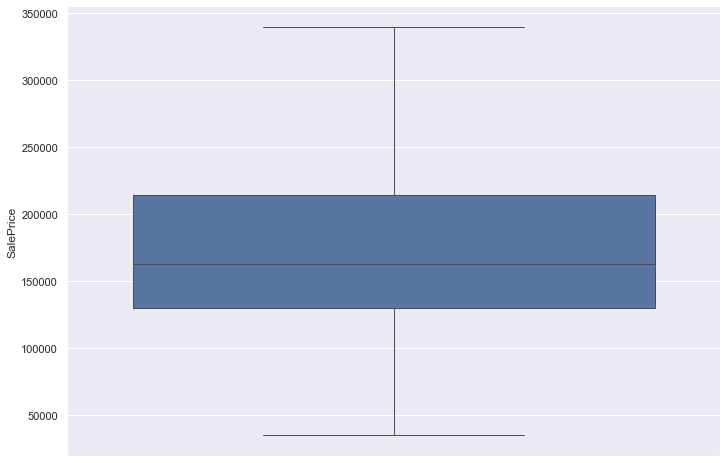

In [24]:
boxplotloop(df2Num, df2Num.describe().columns)

<AxesSubplot:>

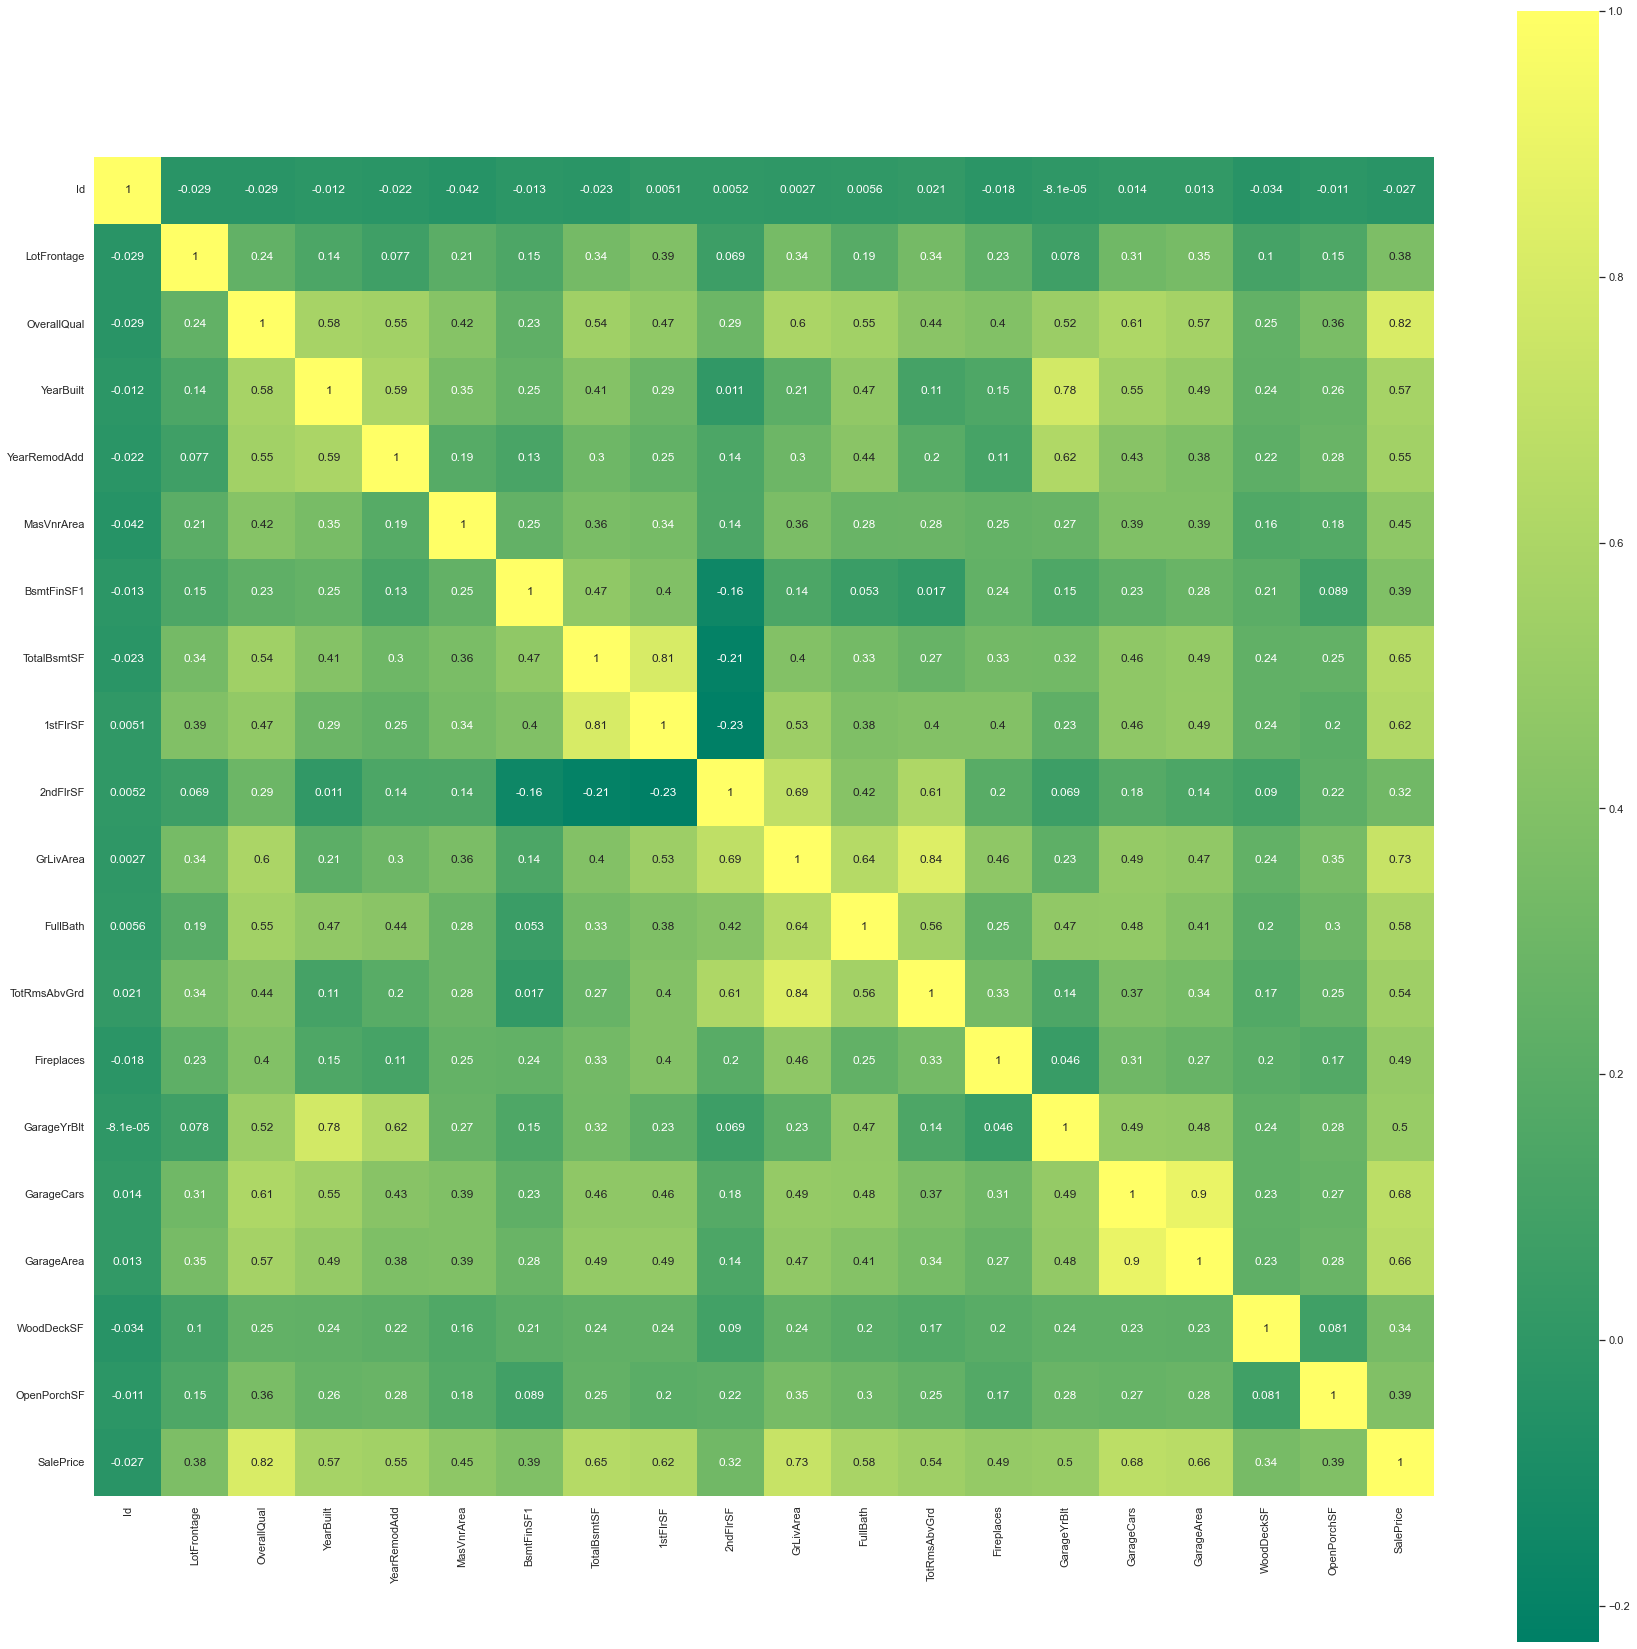

In [25]:
sns.set(rc={'figure.figsize':(30,30)})
color = plt.get_cmap('summer')   # default color
color.set_bad('lightblue')
sns.heatmap(data=df2Num.corr(), square=True, annot=True, fmt='.2g',  cmap= color)

In [26]:
skewValue = df2Num.skew(axis=0, numeric_only=True)
print(skewValue)

Id              0.000000
LotFrontage     0.061947
OverallQual     0.249513
YearBuilt      -0.594020
YearRemodAdd   -0.503562
MasVnrArea      1.281293
BsmtFinSF1      0.739746
TotalBsmtSF     0.237240
1stFlrSF        0.664066
2ndFlrSF        0.800109
GrLivArea       0.593212
FullBath        0.036562
TotRmsAbvGrd    0.366919
Fireplaces      0.550521
GarageYrBlt    -0.666040
GarageCars     -0.418495
GarageArea     -0.069907
WoodDeckSF      1.083673
OpenPorchSF     1.136301
SalePrice       0.802784
dtype: float64


In [27]:
dfCat.head()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [28]:
# What columns have nulls that we need to treat
null_columns = dfCat.isna().sum()
null_columns = null_columns[null_columns > 0]

null_columns

MasVnrType      872
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [29]:
df_clean = dfCat.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean.head()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [30]:
null_columns = df_clean.isna().sum()
null_columns = null_columns[null_columns > 0]

null_columns

Series([], dtype: int64)

In [31]:
dfCat = df_clean.copy()
# Should now see no null vales - SUCCESS
null_columns = dfCat.isna().sum()
null_columns = null_columns[null_columns > 0]

null_columns

Series([], dtype: int64)

In [32]:
dfCat.head()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,250000


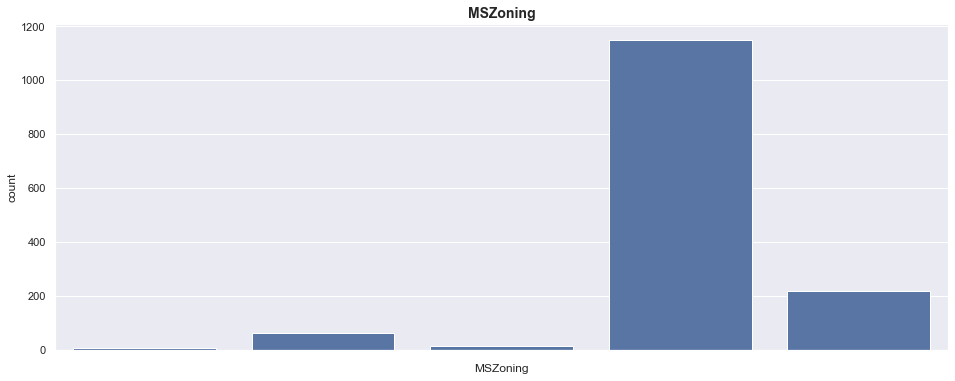

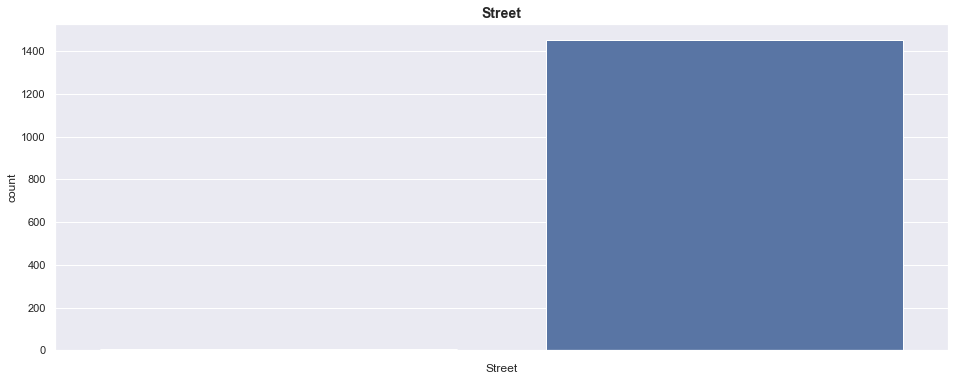

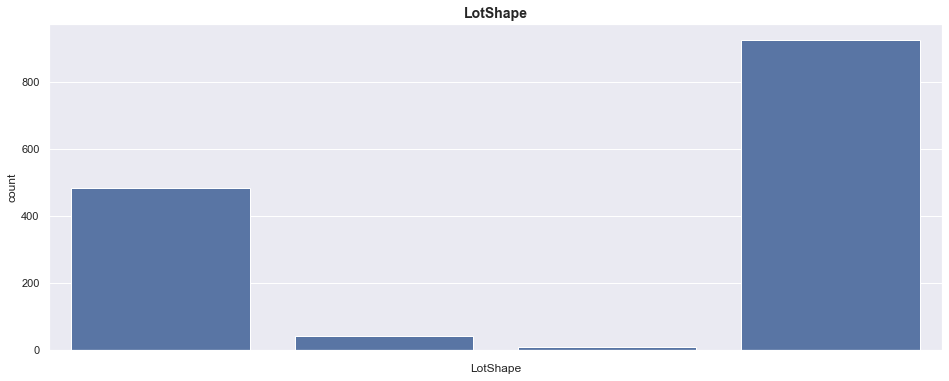

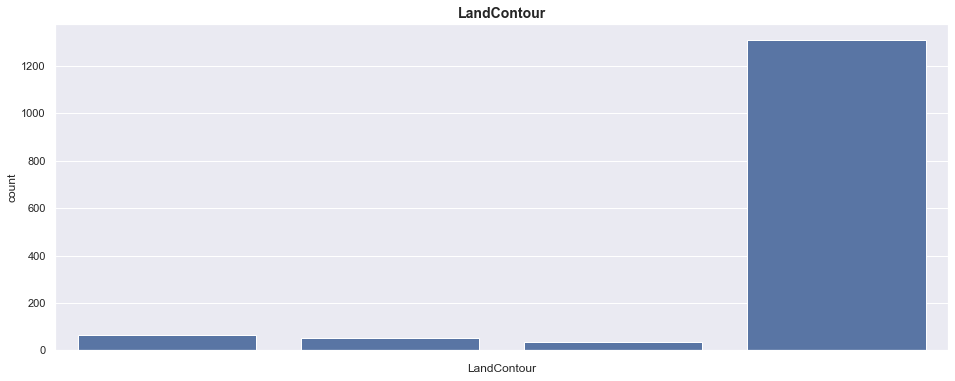

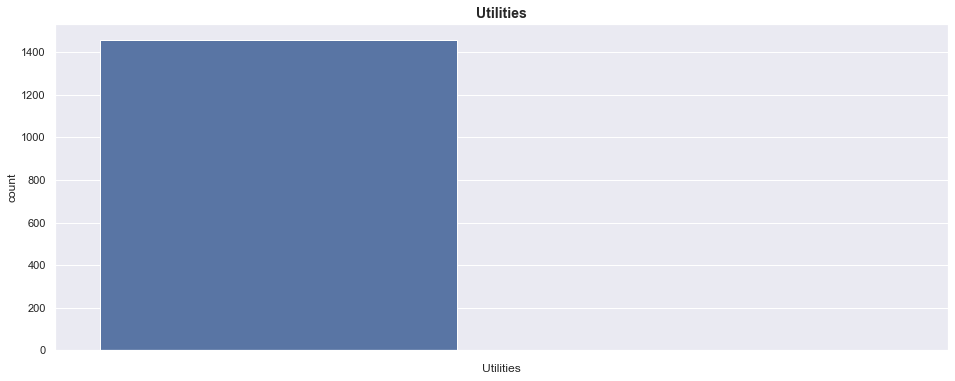

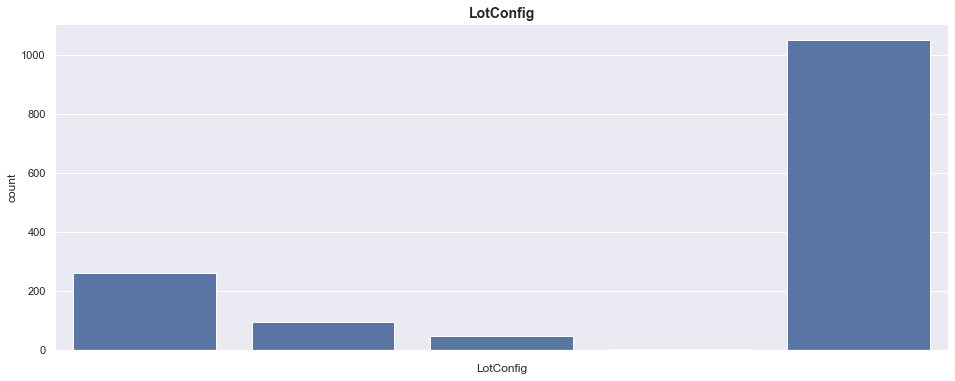

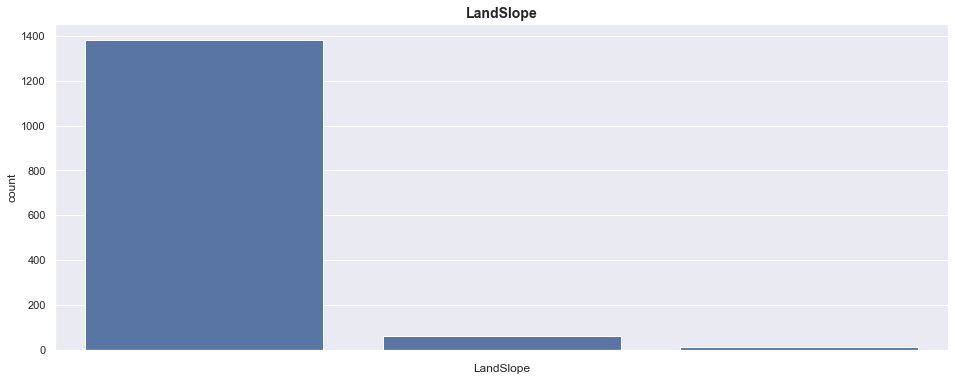

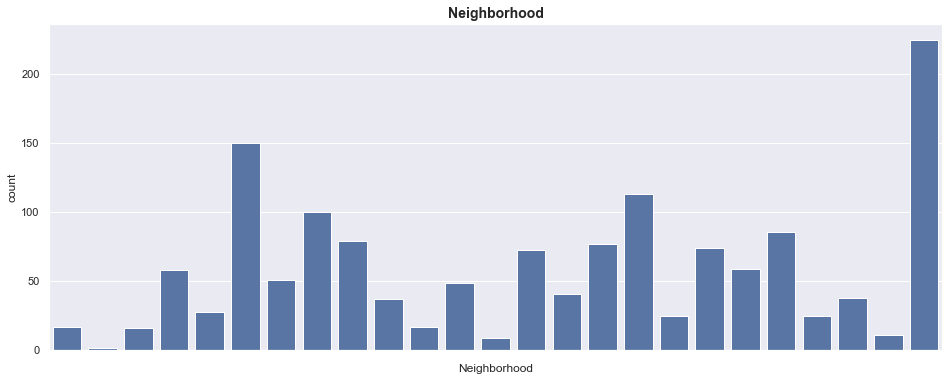

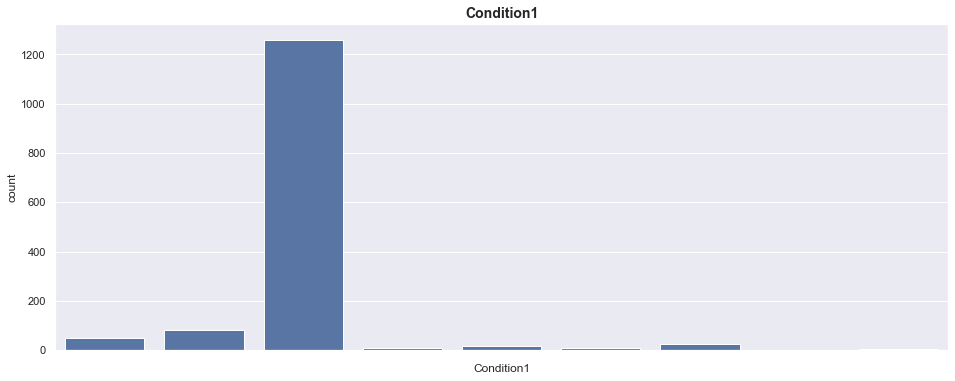

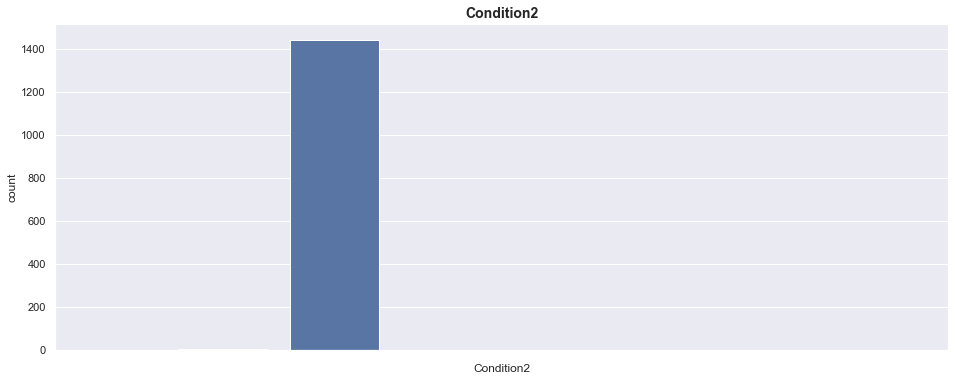

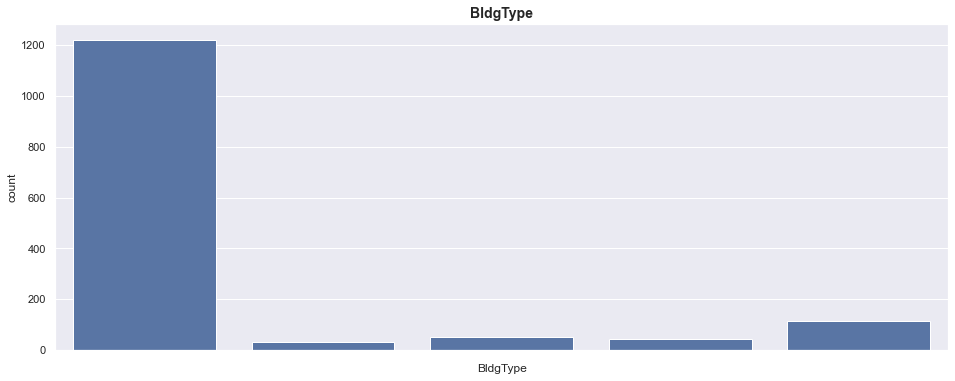

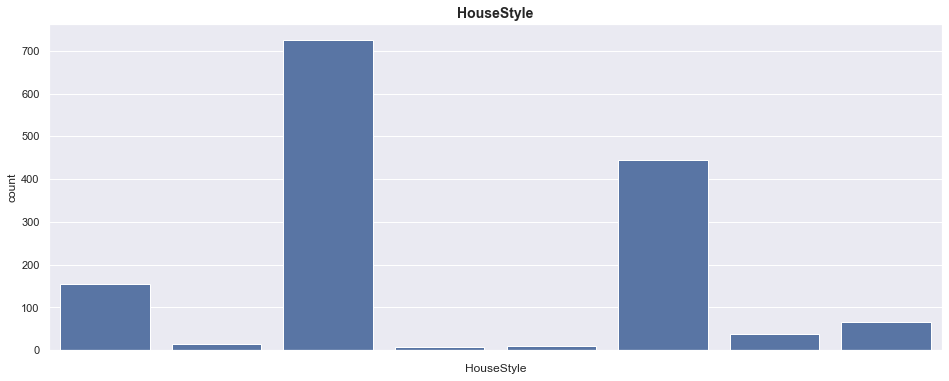

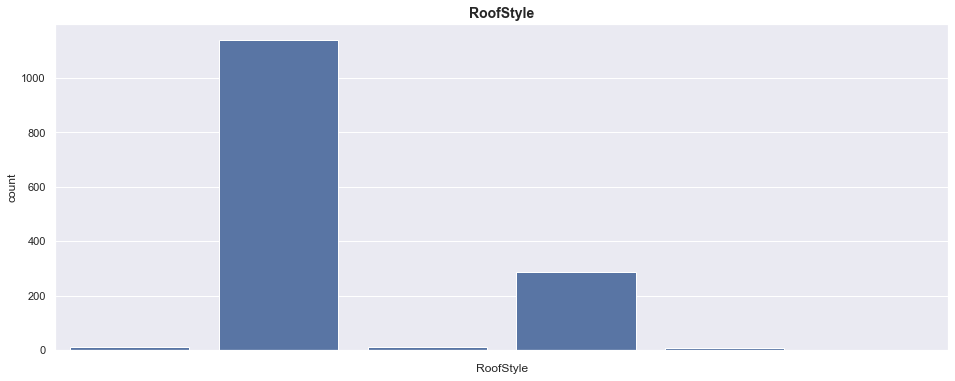

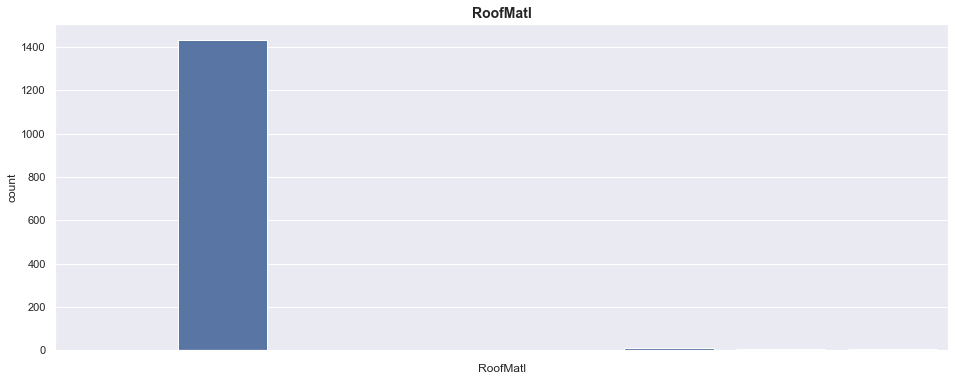

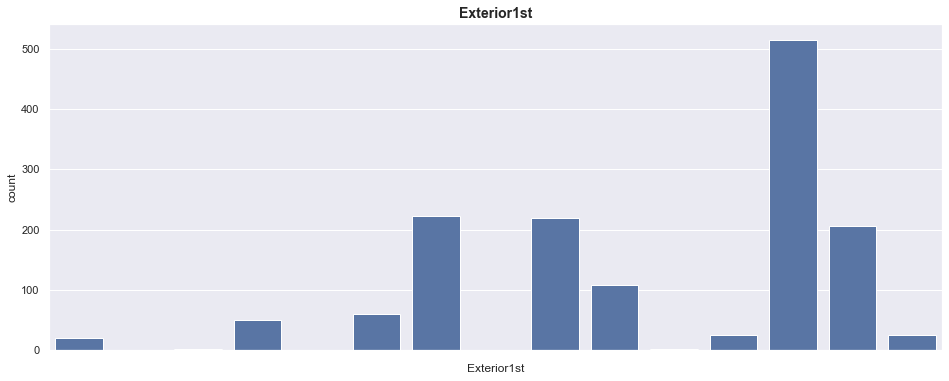

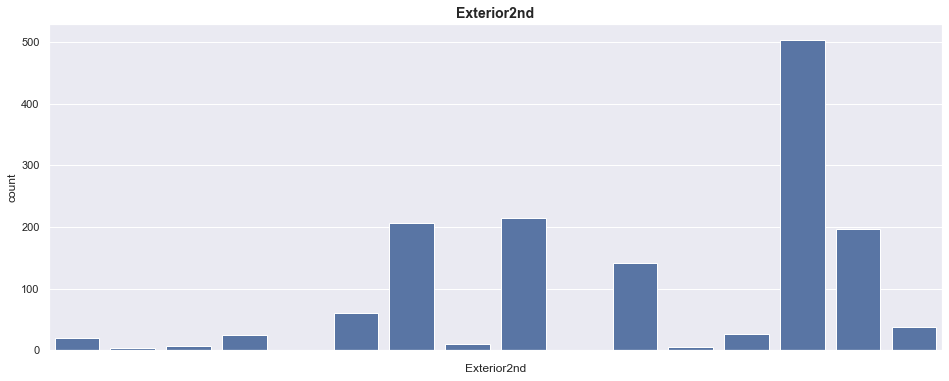

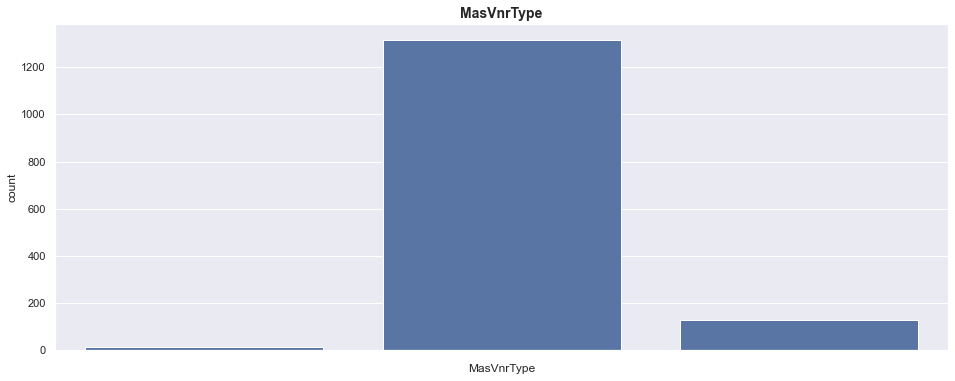

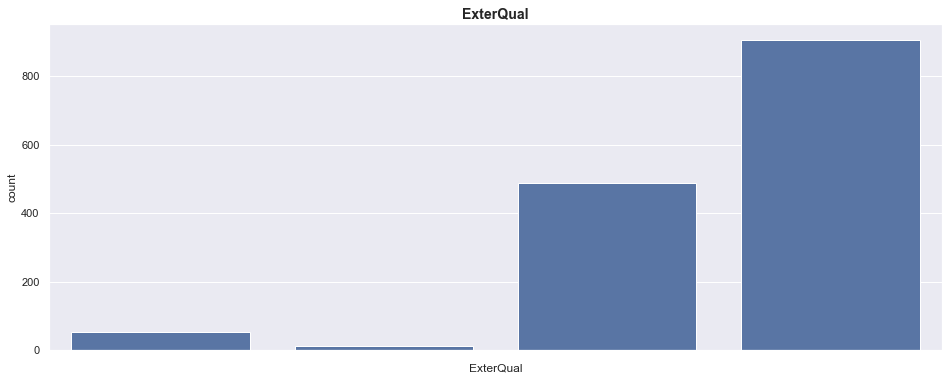

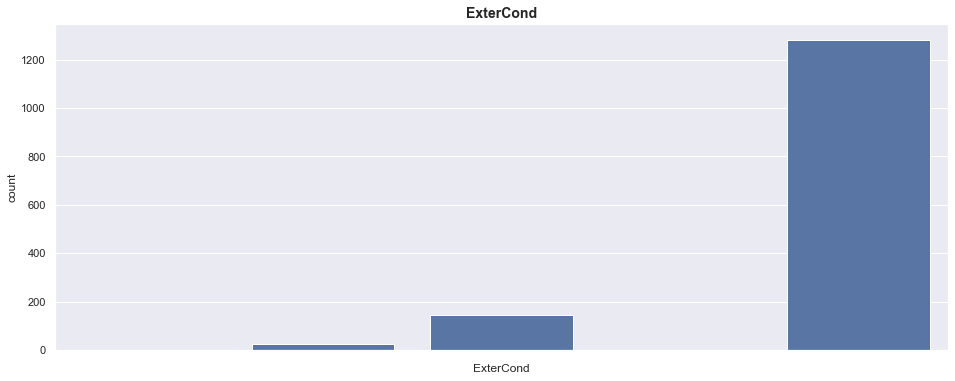

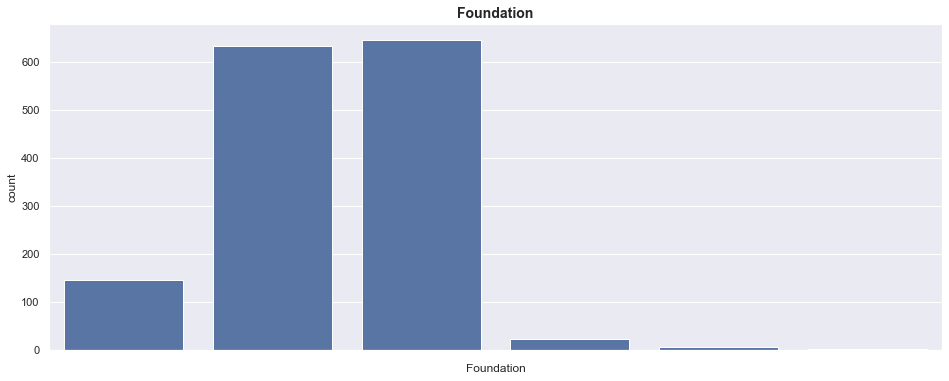

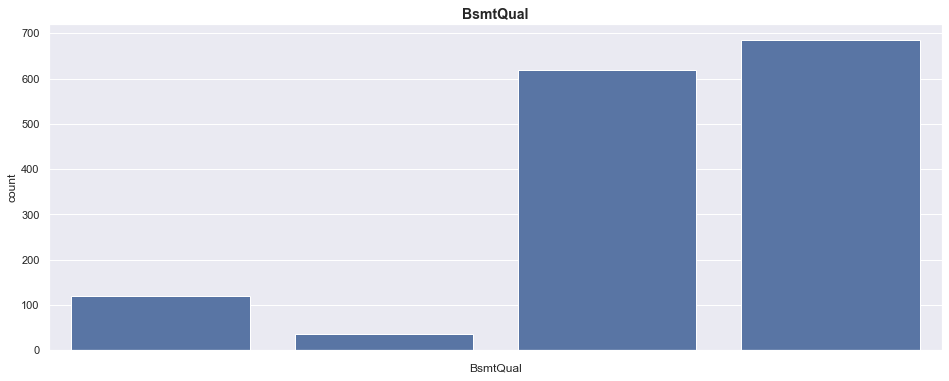

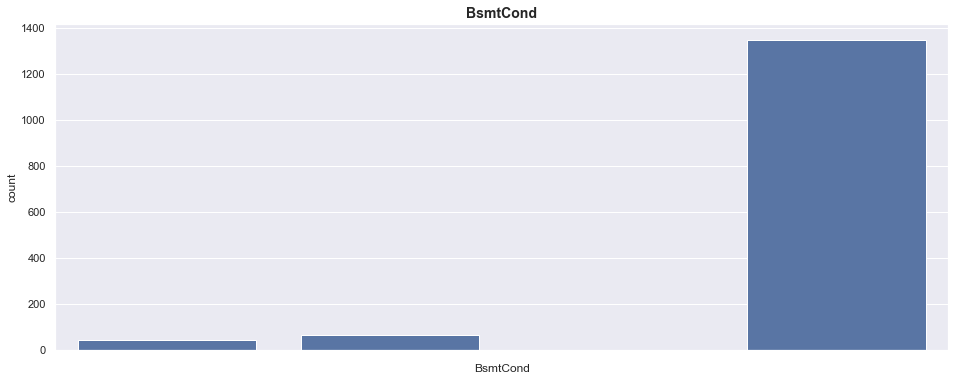

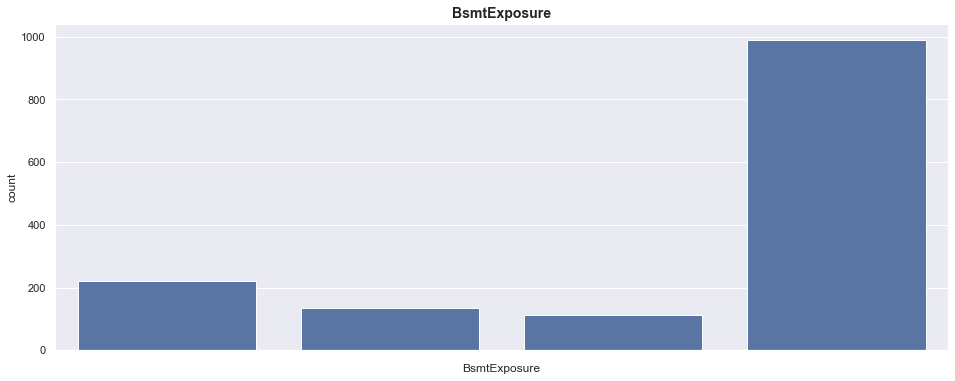

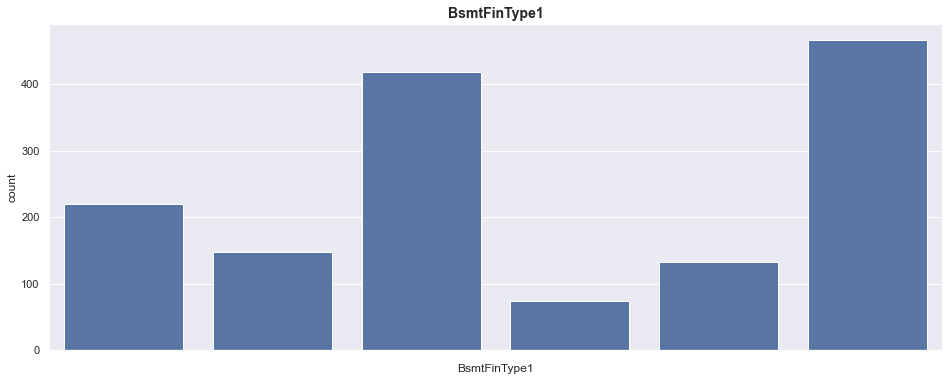

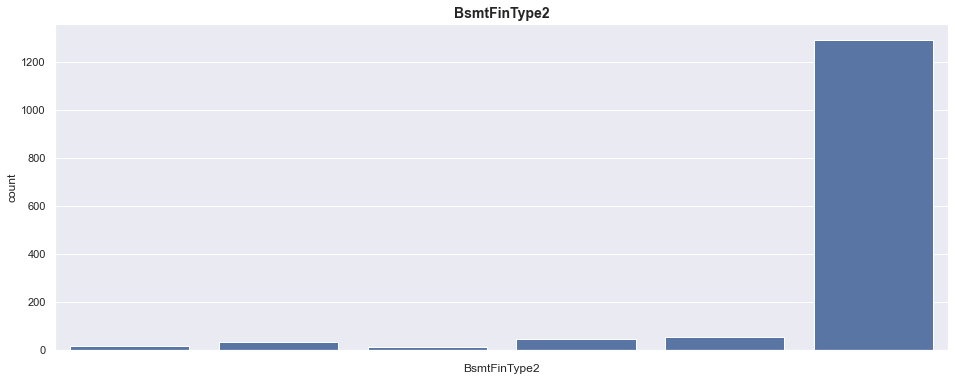

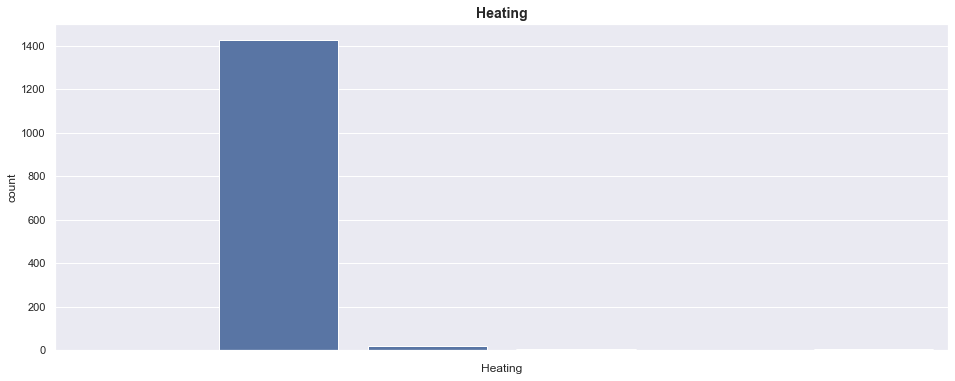

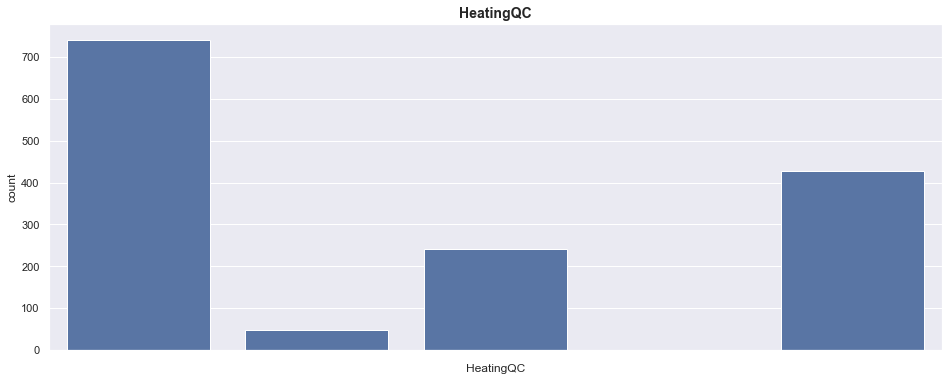

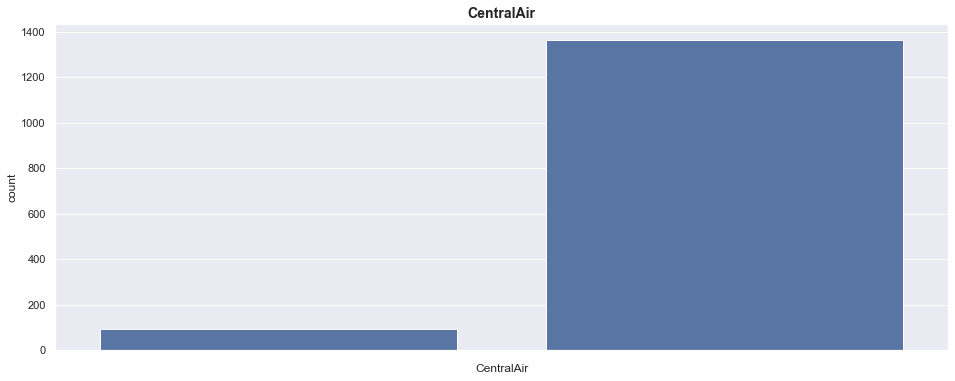

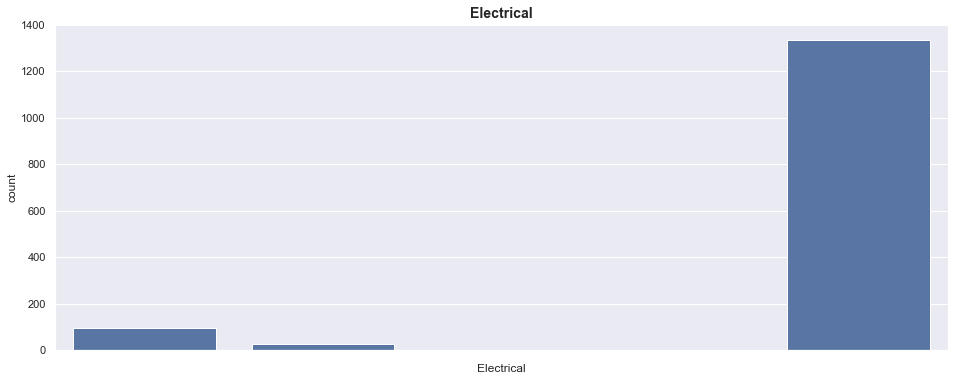

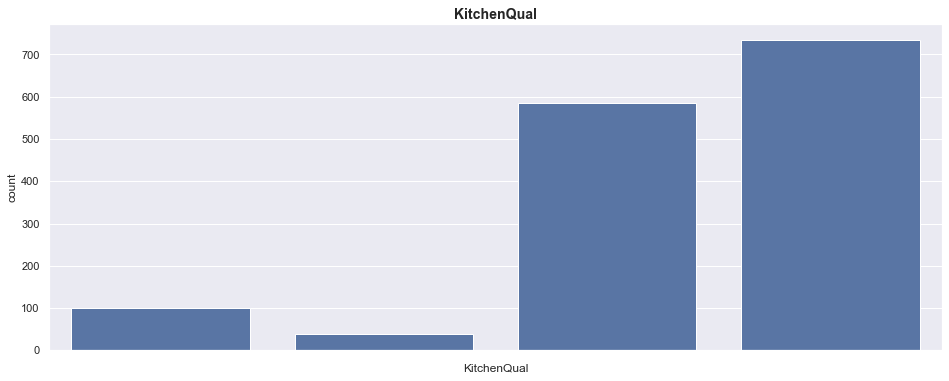

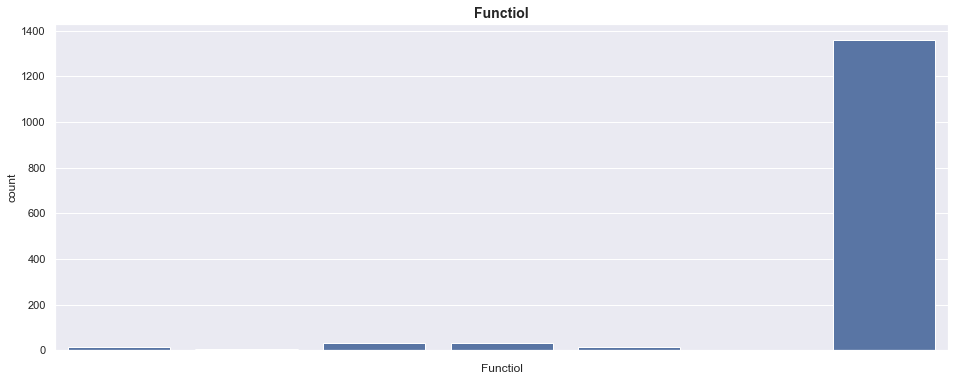

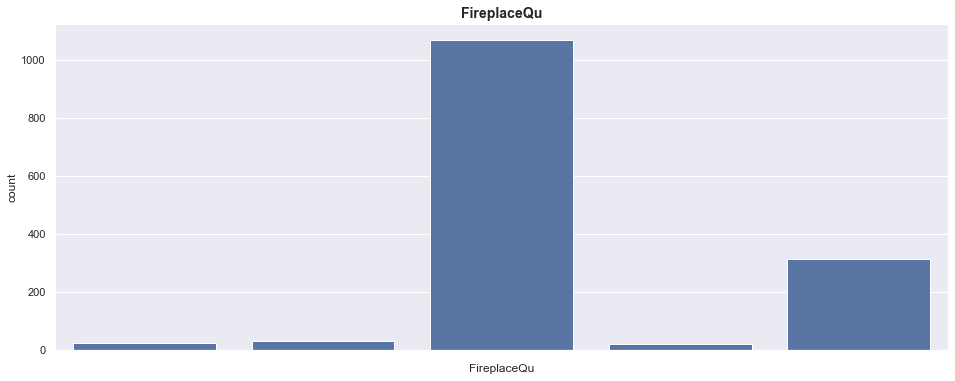

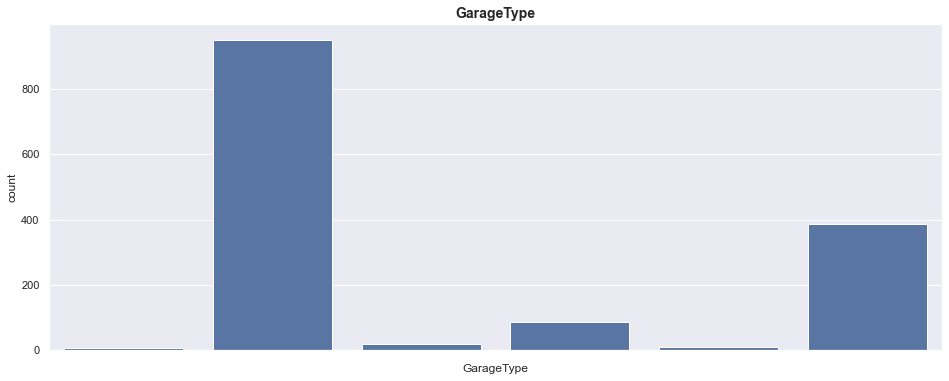

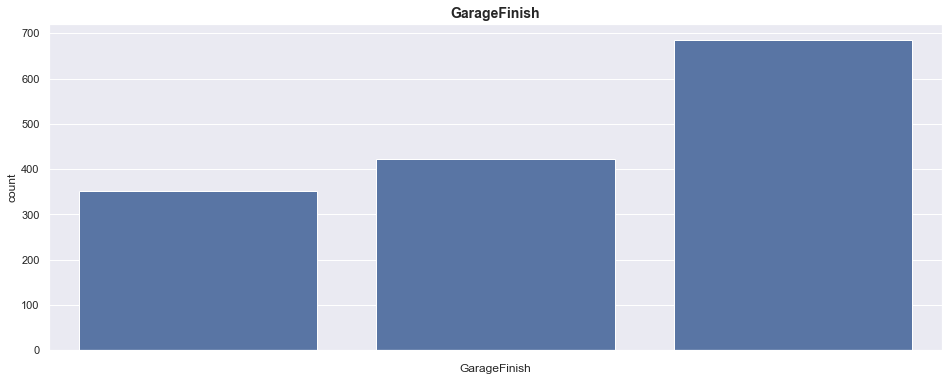

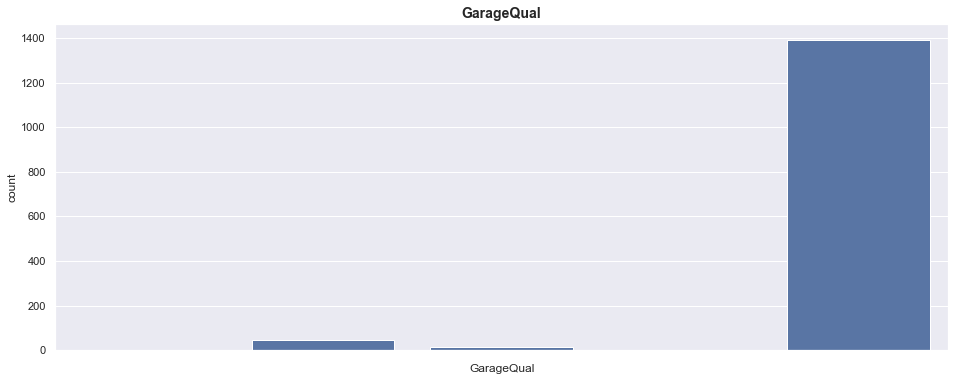

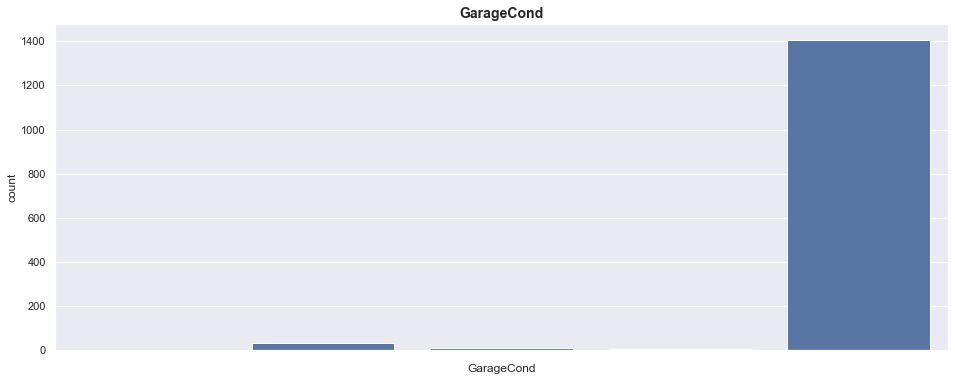

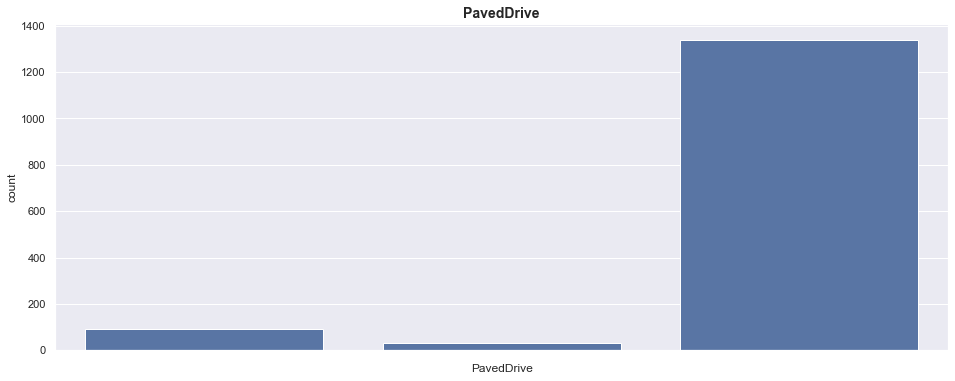

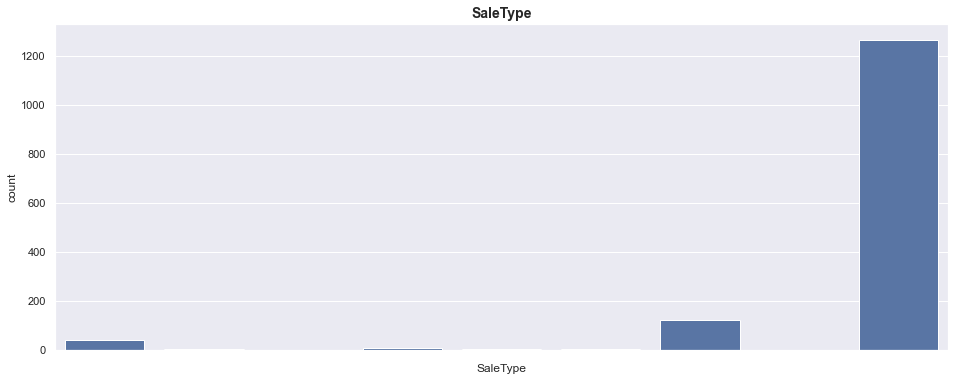

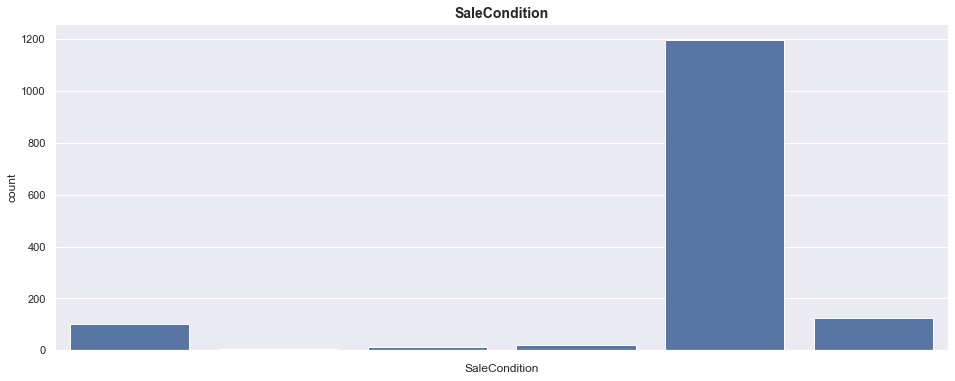

In [33]:
def histPlotLoop(df, columns):
    for col in columns:
        if (df[col].dtype == object) :
            i = dfCat[col].unique()
            i.sort()
            ## Plotting a histogram with the Categorical Data
            plt.figure(figsize=(16,6))
            ax = sns.countplot(x=col, data=df, order=i)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
            plt.title(col, fontsize=14, fontweight='bold')
            plt.show()
            
            
histPlotLoop(dfCat, dfCat.columns)

In [34]:
dfCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  ExterQual      1460 non-null

In [41]:
from scipy.stats import chi2_contingency

# Assuming df_encoded is your DataFrame with encoded categorical variables
categorical_columns = dfCat.select_dtypes(include=['object']).columns

significant_variables = []

for column in categorical_columns:
    contingency_table = pd.crosstab(dfCat[column], dfCat['SalePrice'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    if p < 0.05:  # You can adjust the significance level as needed
        significant_variables.append(column)

print("Significant Variables:", significant_variables)

Significant Variables: ['MSZoning', 'Street', 'LotShape', 'Neighborhood', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'SaleType', 'SaleCondition']


In [43]:
df_CatHigh = dfCat[['Id'] + significant_variables + ['SalePrice']]

# Display the first few rows of the new DataFrame
print(df_CatHigh.head())

   Id MSZoning Street LotShape Neighborhood MasVnrType ExterQual ExterCond  \
0   1       RL   Pave      Reg      CollgCr    BrkFace        Gd        TA   
1   2       RL   Pave      Reg      Veenker    BrkFace        TA        TA   
2   3       RL   Pave      IR1      CollgCr    BrkFace        Gd        TA   
3   4       RL   Pave      IR1      Crawfor    BrkFace        TA        TA   
4   5       RL   Pave      IR1      NoRidge    BrkFace        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure Heating CentralAir KitchenQual  \
0      PConc       Gd       TA           No    GasA          Y          Gd   
1     CBlock       Gd       TA           Gd    GasA          Y          TA   
2      PConc       Gd       TA           Mn    GasA          Y          Gd   
3     BrkTil       TA       Gd           No    GasA          Y          Gd   
4      PConc       Gd       TA           Av    GasA          Y          Gd   

  FireplaceQu GarageFinish SaleType SaleCondition  SalePrice  

In [46]:
df_merge = pd.merge(df2Num, df_CatHigh, how='outer', on = 'Id')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   OverallQual    1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  FullBath       1460 non-null   int64  
 12  TotRmsAbvGrd   1460 non-null   int64  
 13  Fireplaces     1460 non-null   int64  
 14  GarageYrBlt    1460 non-null   float64
 15  GarageCars     1460 non-null   int64  
 16  GarageArea     1460 non-null   int64  
 17  WoodDeckSF     1460 non-null   int64  
 18  OpenPorc